# Logistic Regression - Multi-Class Classification

In [1]:
# Multiple Cell Outputs in Jupyter Notebooks
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


## Dataset
   - Mobile Price Classification Dataset

### Download and Load Dataset

In [3]:
# Dataset Selection AND download Dataset
import tensorflow as tf
import zipfile
import os

# Download Mobile Price Classification Dataset from Kaggle
DATA_URL = "https://www.kaggle.com/api/v1/datasets/download/iabhishekofficial/mobile-price-classification"

print("Downloading dataset...")
# Dataset will be downloaed at <home>/.keras/datasets/cats_and_dogs_filtered.zip
path_to_zip = tf.keras.utils.get_file(
    "mobile-price-classification.zip",   
    origin=DATA_URL,
    extract=False      
)
base_dir = os.path.join(os.path.dirname(path_to_zip), 'mobile-price-classification')

print("Extracting dataset...")
# extracted at <home>/.keras/datasets
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

path_to_csv = os.path.join(base_dir, 'train.csv')


print("Dataset downloaded and extracted successfully at "+ path_to_csv)


# Load the Dataset

df = pd.read_csv(path_to_csv)

print("Mobile Price Classification Dataset Loaded Successfully!")



Extracting dataset...
Dataset downloaded and extracted successfully at /Volumes/DMac/deb/.keras/datasets/mobile-price-classification/train.csv
Mobile Price Classification Dataset Loaded Successfully!


### Explore Dataset

In [4]:
# Dataset Size
print("Dataset Size:")
print("="*80)
df.shape

# Display first few rows
print("First 5 rows of the dataset:")
print("="*80)
df.head()

# Display last few rows
print("Last 5 rows of the dataset:")
print("="*80)
df.tail()

# Dataset information
print("Dataset Information:")
print("="*80)
df.info()

# Statistical summary
print("Statistical Summary:")
print("="*80)
df.describe()

# Display column names
print("Column Names:")
print("="*80)
print(df.columns.tolist())
print(f"\nTotal Features: {len(df.columns) - 1}")


# Data types of features
print("Data Types:")
print("="*80)
print(df.dtypes.value_counts())
print("\nAll features are numerical!")

# Target variable distribution
print("Target Variable (price_range) Distribution:")
print("="*80)
print(df['price_range'].value_counts().sort_index())
print("\nPercentage Distribution:")
print(df['price_range'].value_counts(normalize=True).sort_index() * 100)

Dataset Size:


(2000, 21)

First 5 rows of the dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Last 5 rows of the dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Column Names:
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

Total Features: 20
Data Types:
int64      19
float64     2
Name: count, dtype: int64

All features are numerical!
Target Variable (price_range) Distribution:
price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

Percentage Distribution:
price_range
0    25.0
1    25.0
2    25.0
3    25.0
Name: proportion, dtype: float64


### Dataset Visualization

#### Visualize Target Variable Distribution

<Axes: xlabel='price_range'>

Text(0.5, 1.0, 'Price Range Distribution')

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'Count')

[Text(0, 0, 'Low (0)'),
 Text(1, 0, 'Medium (1)'),
 Text(2, 0, 'High (2)'),
 Text(3, 0, 'Very High (3)')]

Text(0, 510, '500')

Text(1, 510, '500')

Text(2, 510, '500')

Text(3, 510, '500')

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Price Range Proportion')

Text(0, 0.5, '')

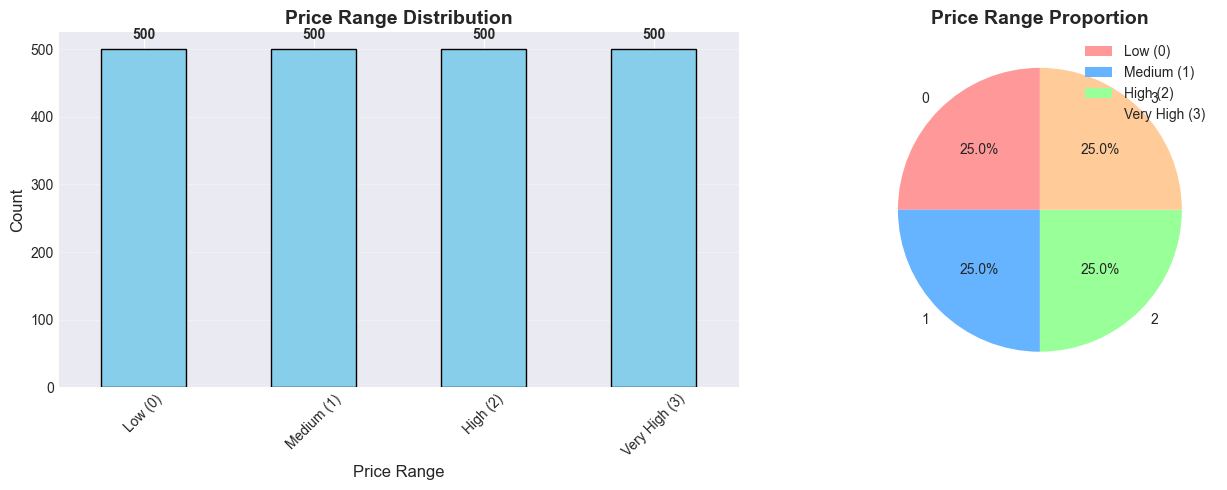

✓ Target variable is perfectly balanced!


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
df['price_range'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Price Range Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Price Range', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)'], rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(df['price_range'].value_counts().sort_index()):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2 = axes[1]
df['price_range'].value_counts().sort_index().plot(
    kind='pie', 
    ax=ax2, 
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    startangle=90
)
ax2.set_title('Price Range Proportion', fontsize=14, fontweight='bold')
ax2.set_ylabel('')
ax2.legend(['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)'], loc='best')

plt.tight_layout()
plt.show()

print("✓ Target variable is perfectly balanced!")

#### Identify and Visualize Binary and Continuous Features

Binary Features (6): ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

Continuous Features (14): ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


<Axes: xlabel='blue'>

Text(0.5, 1.0, 'BLUE Distribution')

Text(0.5, 0, 'blue')

Text(0, 0.5, 'Count')

[Text(0, 0, 'No (0)'), Text(1, 0, 'Yes (1)')]

Text(0, 1030, '1010')

Text(1, 1010, '990')

<Axes: xlabel='dual_sim'>

Text(0.5, 1.0, 'DUAL_SIM Distribution')

Text(0.5, 0, 'dual_sim')

Text(0, 0.5, 'Count')

[Text(0, 0, 'No (0)'), Text(1, 0, 'Yes (1)')]

Text(0, 1039, '1019')

Text(1, 1001, '981')

<Axes: xlabel='four_g'>

Text(0.5, 1.0, 'FOUR_G Distribution')

Text(0.5, 0, 'four_g')

Text(0, 0.5, 'Count')

[Text(0, 0, 'No (0)'), Text(1, 0, 'Yes (1)')]

Text(0, 1063, '1043')

Text(1, 977, '957')

<Axes: xlabel='three_g'>

Text(0.5, 1.0, 'THREE_G Distribution')

Text(0.5, 0, 'three_g')

Text(0, 0.5, 'Count')

[Text(0, 0, 'No (0)'), Text(1, 0, 'Yes (1)')]

Text(0, 1543, '1523')

Text(1, 497, '477')

<Axes: xlabel='touch_screen'>

Text(0.5, 1.0, 'TOUCH_SCREEN Distribution')

Text(0.5, 0, 'touch_screen')

Text(0, 0.5, 'Count')

[Text(0, 0, 'No (0)'), Text(1, 0, 'Yes (1)')]

Text(0, 1026, '1006')

Text(1, 1014, '994')

<Axes: xlabel='wifi'>

Text(0.5, 1.0, 'WIFI Distribution')

Text(0.5, 0, 'wifi')

Text(0, 0.5, 'Count')

[Text(0, 0, 'No (0)'), Text(1, 0, 'Yes (1)')]

Text(0, 1034, '1014')

Text(1, 1006, '986')

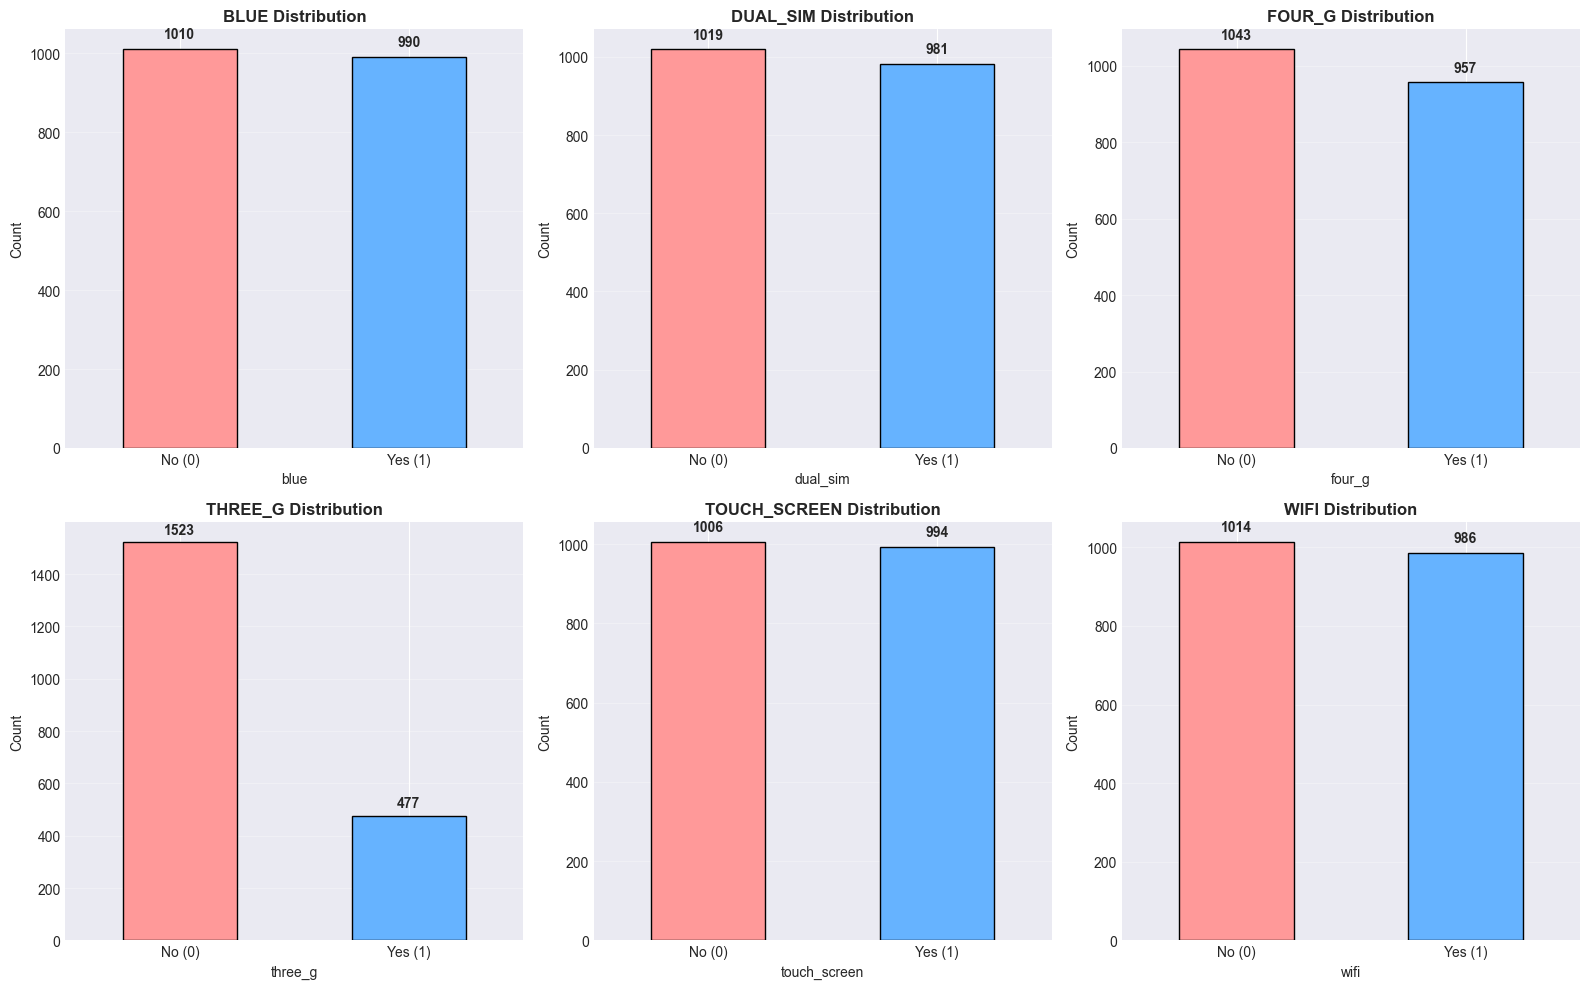

(array([73., 75., 75., 63., 73., 63., 76., 67., 67., 63., 62., 74., 59.,
        77., 54., 63., 70., 52., 71., 61., 61., 80., 57., 64., 70., 58.,
        69., 67., 59., 77.]),
 array([ 501. ,  550.9,  600.8,  650.7,  700.6,  750.5,  800.4,  850.3,
         900.2,  950.1, 1000. , 1049.9, 1099.8, 1149.7, 1199.6, 1249.5,
        1299.4, 1349.3, 1399.2, 1449.1, 1499. , 1548.9, 1598.8, 1648.7,
        1698.6, 1748.5, 1798.4, 1848.3, 1898.2, 1948.1, 1998. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'BATTERY_POWER')

Text(0.5, 0, 'battery_power')

Text(0, 0.5, 'Frequency')

(array([413.,  74.,  64.,  58.,  58.,   0.,  61.,  51.,  56.,  68.,  70.,
          0.,  67.,  76.,  60.,  62.,  65.,   0.,  67.,  76.,  59.,  78.,
         58.,   0.,  74.,  55.,  55.,  85.,  62.,  28.]),
 array([0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
        0.91666667, 1.        , 1.08333333, 1.16666667, 1.25      ,
        1.33333333, 1.41666667, 1.5       , 1.58333333, 1.66666667,
        1.75      , 1.83333333, 1.91666667, 2.        , 2.08333333,
        2.16666667, 2.25      , 2.33333333, 2.41666667, 2.5       ,
        2.58333333, 2.66666667, 2.75      , 2.83333333, 2.91666667,
        3.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'CLOCK_SPEED')

Text(0.5, 0, 'clock_speed')

Text(0, 0.5, 'Frequency')

(array([474., 245.,   0., 189., 170.,   0., 133., 139.,   0., 112.,   0.,
        100.,  77.,   0.,  78.,  62.,   0.,  51.,  45.,   0.,  40.,   0.,
         20.,  23.,   0.,  24.,   6.,   0.,  11.,   1.]),
 array([ 0.        ,  0.63333333,  1.26666667,  1.9       ,  2.53333333,
         3.16666667,  3.8       ,  4.43333333,  5.06666667,  5.7       ,
         6.33333333,  6.96666667,  7.6       ,  8.23333333,  8.86666667,
         9.5       , 10.13333333, 10.76666667, 11.4       , 12.03333333,
        12.66666667, 13.3       , 13.93333333, 14.56666667, 15.2       ,
        15.83333333, 16.46666667, 17.1       , 17.73333333, 18.36666667,
        19.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'FC')

Text(0.5, 0, 'fc')

Text(0, 0.5, 'Frequency')

(array([ 87.,  73.,  77.,  71.,  70.,  76.,  72.,  57.,  68.,  60.,  66.,
         53.,  73.,  63.,  60., 101.,  51.,  53.,  67.,  64.,  72.,  60.,
         57.,  66.,  63.,  61.,  69.,  54.,  54.,  82.]),
 array([ 2.        ,  4.06666667,  6.13333333,  8.2       , 10.26666667,
        12.33333333, 14.4       , 16.46666667, 18.53333333, 20.6       ,
        22.66666667, 24.73333333, 26.8       , 28.86666667, 30.93333333,
        33.        , 35.06666667, 37.13333333, 39.2       , 41.26666667,
        43.33333333, 45.4       , 47.46666667, 49.53333333, 51.6       ,
        53.66666667, 55.73333333, 57.8       , 59.86666667, 61.93333333,
        64.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'INT_MEMORY')

Text(0.5, 0, 'int_memory')

Text(0, 0.5, 'Frequency')

(array([320.,   0.,   0., 213.,   0.,   0., 199.,   0.,   0.,   0., 168.,
          0.,   0., 205.,   0.,   0., 186.,   0.,   0., 200.,   0.,   0.,
          0., 208.,   0.,   0., 195.,   0.,   0., 106.]),
 array([0.1 , 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.34, 0.37, 0.4 ,
        0.43, 0.46, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.67, 0.7 , 0.73,
        0.76, 0.79, 0.82, 0.85, 0.88, 0.91, 0.94, 0.97, 1.  ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'M_DEP')

Text(0.5, 0, 'm_dep')

Text(0, 0.5, 'Frequency')

(array([ 68.,  64.,  77.,  58.,  48.,  86.,  80.,  63.,  71.,  54.,  57.,
         60.,  71.,  67.,  63.,  55.,  79.,  62.,  63.,  73.,  72.,  58.,
         66.,  59.,  52.,  70.,  81.,  57.,  57., 109.]),
 array([ 80.,  84.,  88.,  92.,  96., 100., 104., 108., 112., 116., 120.,
        124., 128., 132., 136., 140., 144., 148., 152., 156., 160., 164.,
        168., 172., 176., 180., 184., 188., 192., 196., 200.]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'MOBILE_WT')

Text(0.5, 0, 'mobile_wt')

Text(0, 0.5, 'Frequency')

(array([242.,   0.,   0.,   0., 247.,   0.,   0.,   0., 246.,   0.,   0.,
          0., 274.,   0.,   0.,   0.,   0., 246.,   0.,   0.,   0., 230.,
          0.,   0.,   0., 259.,   0.,   0.,   0., 256.]),
 array([1.        , 1.23333333, 1.46666667, 1.7       , 1.93333333,
        2.16666667, 2.4       , 2.63333333, 2.86666667, 3.1       ,
        3.33333333, 3.56666667, 3.8       , 4.03333333, 4.26666667,
        4.5       , 4.73333333, 4.96666667, 5.2       , 5.43333333,
        5.66666667, 5.9       , 6.13333333, 6.36666667, 6.6       ,
        6.83333333, 7.06666667, 7.3       , 7.53333333, 7.76666667,
        8.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'N_CORES')

Text(0.5, 0, 'n_cores')

Text(0, 0.5, 'Frequency')

(array([101., 104.,   0.,  99.,  93.,   0.,  95.,  59.,   0.,  95., 119.,
          0.,  89., 112.,   0., 122.,  79.,   0.,  90.,  85.,   0., 104.,
         92.,   0.,  88.,  99.,   0.,  82.,  83., 110.]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.33333333, 16.        ,
        16.66666667, 17.33333333, 18.        , 18.66666667, 19.33333333,
        20.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'PC')

Text(0.5, 0, 'pc')

Text(0, 0.5, 'Frequency')

(array([ 93., 119., 131., 112., 125., 121., 124., 110.,  95., 111., 100.,
         82.,  72.,  69.,  73.,  59.,  62.,  55.,  57.,  43.,  35.,  29.,
         28.,  14.,  27.,  15.,  13.,  11.,   8.,   7.]),
 array([   0.        ,   65.33333333,  130.66666667,  196.        ,
         261.33333333,  326.66666667,  392.        ,  457.33333333,
         522.66666667,  588.        ,  653.33333333,  718.66666667,
         784.        ,  849.33333333,  914.66666667,  980.        ,
        1045.33333333, 1110.66666667, 1176.        , 1241.33333333,
        1306.66666667, 1372.        , 1437.33333333, 1502.66666667,
        1568.        , 1633.33333333, 1698.66666667, 1764.        ,
        1829.33333333, 1894.66666667, 1960.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'PX_HEIGHT')

Text(0.5, 0, 'px_height')

Text(0, 0.5, 'Frequency')

(array([68., 58., 55., 74., 71., 65., 73., 82., 47., 63., 82., 59., 54.,
        75., 78., 64., 64., 77., 67., 69., 59., 58., 61., 68., 75., 69.,
        52., 65., 72., 76.]),
 array([ 500.        ,  549.93333333,  599.86666667,  649.8       ,
         699.73333333,  749.66666667,  799.6       ,  849.53333333,
         899.46666667,  949.4       ,  999.33333333, 1049.26666667,
        1099.2       , 1149.13333333, 1199.06666667, 1249.        ,
        1298.93333333, 1348.86666667, 1398.8       , 1448.73333333,
        1498.66666667, 1548.6       , 1598.53333333, 1648.46666667,
        1698.4       , 1748.33333333, 1798.26666667, 1848.2       ,
        1898.13333333, 1948.06666667, 1998.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'PX_WIDTH')

Text(0.5, 0, 'px_width')

Text(0, 0.5, 'Frequency')

(array([66., 70., 79., 65., 62., 56., 64., 70., 72., 78., 52., 70., 60.,
        58., 71., 63., 86., 70., 72., 68., 62., 62., 52., 67., 64., 71.,
        62., 69., 68., 71.]),
 array([ 256.        ,  380.73333333,  505.46666667,  630.2       ,
         754.93333333,  879.66666667, 1004.4       , 1129.13333333,
        1253.86666667, 1378.6       , 1503.33333333, 1628.06666667,
        1752.8       , 1877.53333333, 2002.26666667, 2127.        ,
        2251.73333333, 2376.46666667, 2501.2       , 2625.93333333,
        2750.66666667, 2875.4       , 3000.13333333, 3124.86666667,
        3249.6       , 3374.33333333, 3499.06666667, 3623.8       ,
        3748.53333333, 3873.26666667, 3998.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'RAM')

Text(0.5, 0, 'ram')

Text(0, 0.5, 'Frequency')

(array([ 97.,   0., 114.,   0., 151.,   0., 117.,   0., 124.,   0., 125.,
          0., 126.,   0.,   0., 157.,   0., 131.,   0., 143.,   0., 135.,
          0., 143.,   0., 193.,   0., 120.,   0., 124.]),
 array([ 5.        ,  5.46666667,  5.93333333,  6.4       ,  6.86666667,
         7.33333333,  7.8       ,  8.26666667,  8.73333333,  9.2       ,
         9.66666667, 10.13333333, 10.6       , 11.06666667, 11.53333333,
        12.        , 12.46666667, 12.93333333, 13.4       , 13.86666667,
        14.33333333, 14.8       , 15.26666667, 15.73333333, 16.2       ,
        16.66666667, 17.13333333, 17.6       , 18.06666667, 18.53333333,
        19.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'SC_H')

Text(0.5, 0, 'sc_h')

Text(0, 0.5, 'Frequency')

(array([180., 210.,   0., 156.,   0., 199., 182.,   0., 161.,   0., 130.,
        132.,   0., 125.,   0.,  97., 107.,   0.,  84.,   0.,  68.,  49.,
          0.,  33.,   0.,  31.,  29.,   0.,  19.,   8.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
         6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6,
        13.2, 13.8, 14.4, 15. , 15.6, 16.2, 16.8, 17.4, 18. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'SC_W')

Text(0.5, 0, 'sc_w')

Text(0, 0.5, 'Frequency')

(array([ 99.,  94.,   0., 123.,   0.,  93., 111.,   0., 124.,   0., 104.,
        100.,   0., 105.,   0., 103.,  99.,   0., 100.,   0., 101., 115.,
          0., 116.,   0.,  98., 100.,   0., 113., 102.]),
 array([ 2. ,  2.6,  3.2,  3.8,  4.4,  5. ,  5.6,  6.2,  6.8,  7.4,  8. ,
         8.6,  9.2,  9.8, 10.4, 11. , 11.6, 12.2, 12.8, 13.4, 14. , 14.6,
        15.2, 15.8, 16.4, 17. , 17.6, 18.2, 18.8, 19.4, 20. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'TALK_TIME')

Text(0.5, 0, 'talk_time')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Continuous Features')

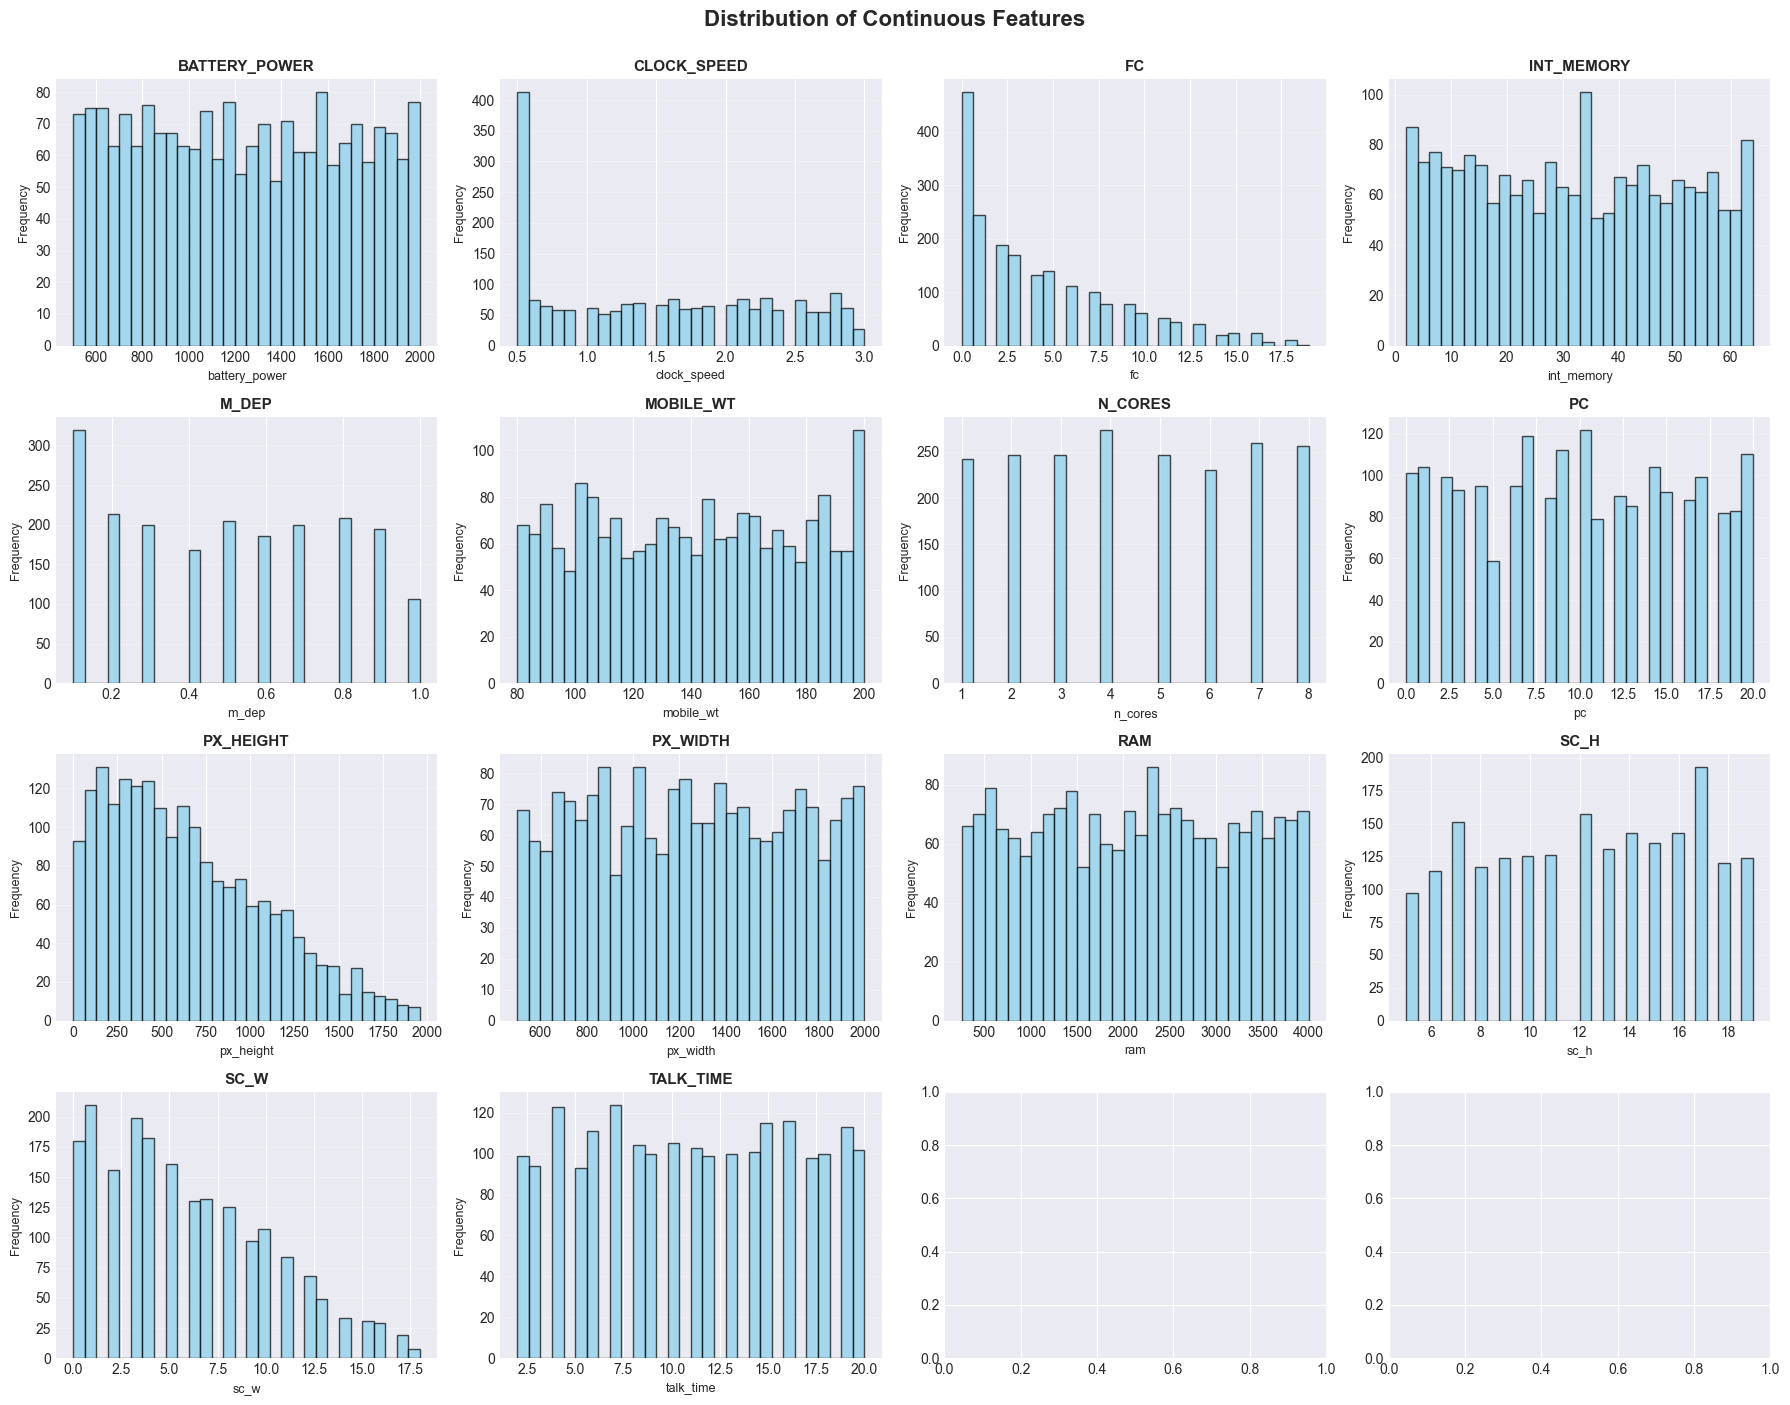

In [6]:

binary_features = [col for col in df.columns if df[col].nunique() == 2 and col != 'price_range']
continuous_features = [col for col in df.columns if col not in binary_features and col != 'price_range']

print(f"Binary Features ({len(binary_features)}): {binary_features}")
print(f"\nContinuous Features ({len(continuous_features)}): {continuous_features}")

# Visualize binary features

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(binary_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[idx], color=['#ff9999', '#66b3ff'], edgecolor='black')
    axes[idx].set_title(f'{feature.upper()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(df[feature].value_counts()):
        axes[idx].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Visualize continuous features - Histograms

fig, axes = plt.subplots(4, 4, figsize=(18, 14))
axes = axes.ravel()

for idx, feature in enumerate(continuous_features[:16]):
    axes[idx].hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature.upper()}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of Continuous Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


#### Correlation Analysis
   - Correlation with target variable
   - Feature Relationships with Target

<Figure size 1800x1400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - All Features')

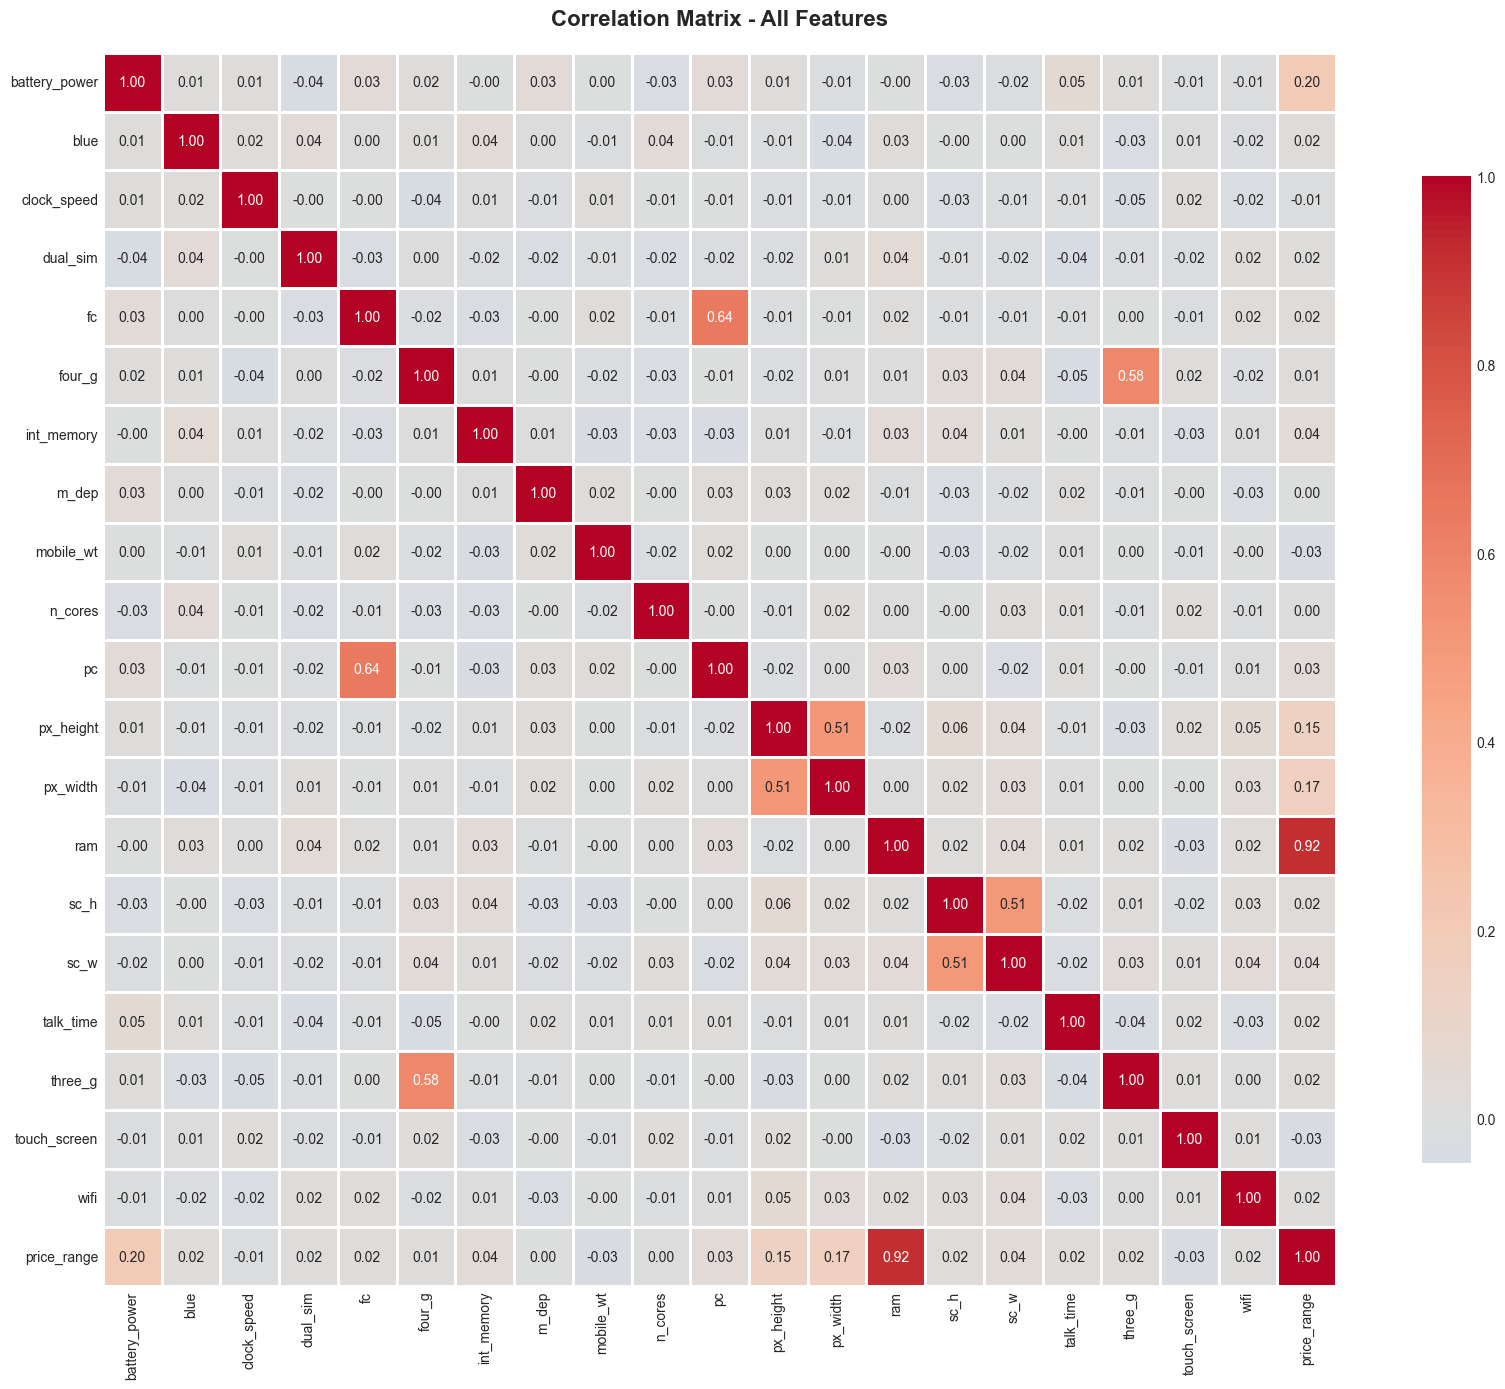

Correlation with Target Variable (price_range):
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation with Price Range')

Text(0.5, 0, 'Correlation Coefficient')

Text(0, 0.5, 'Features')

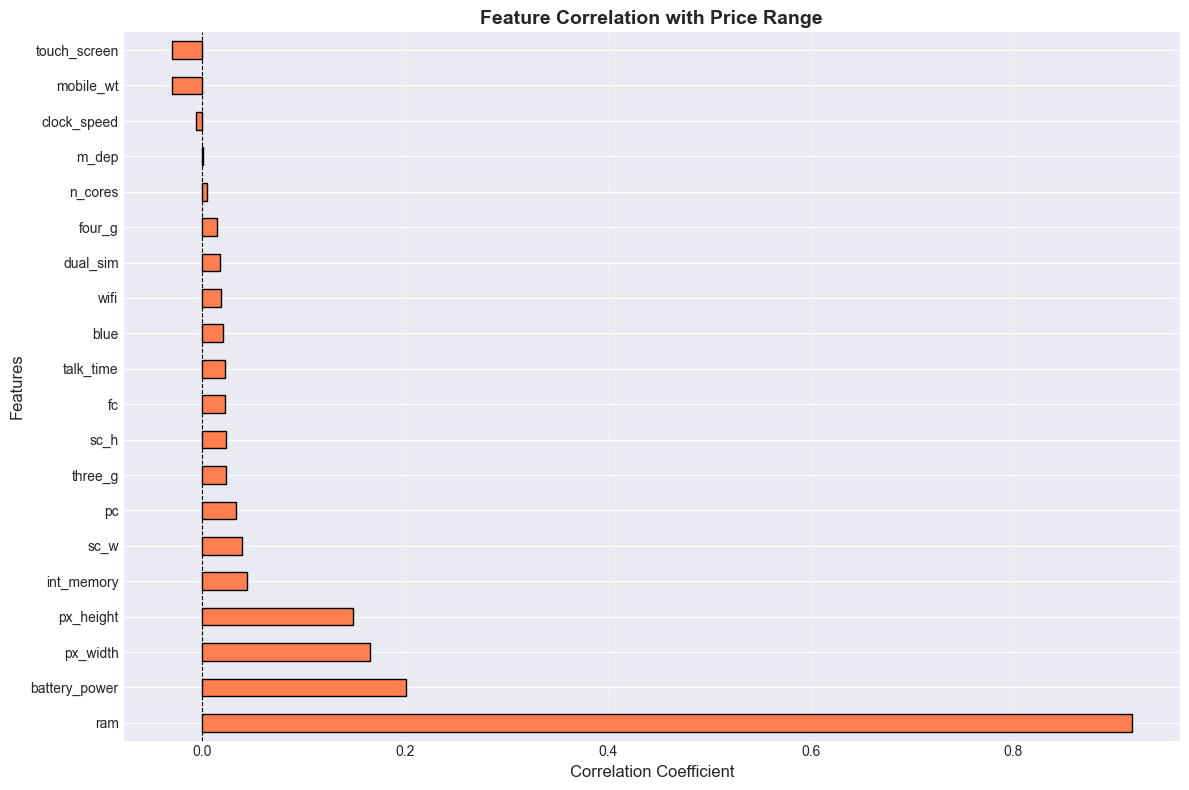


Top 5 Most Correlated Features:
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
Name: price_range, dtype: float64


<Axes: title={'center': 'ram'}, xlabel='price_range'>

Text(0.5, 1.0, 'RAM by Price Range')

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'ram')

Text(0.5, 0.98, '')

<Axes: title={'center': 'battery_power'}, xlabel='price_range'>

Text(0.5, 1.0, 'BATTERY_POWER by Price Range')

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'battery_power')

Text(0.5, 0.98, '')

<Axes: title={'center': 'px_height'}, xlabel='price_range'>

Text(0.5, 1.0, 'PX_HEIGHT by Price Range')

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'px_height')

Text(0.5, 0.98, '')

<Axes: title={'center': 'px_width'}, xlabel='price_range'>

Text(0.5, 1.0, 'PX_WIDTH by Price Range')

Text(0.5, 0, 'Price Range')

Text(0, 0.5, 'px_width')

Text(0.5, 0.98, '')

Text(0.5, 1.0, 'Top Features Distribution by Price Range')

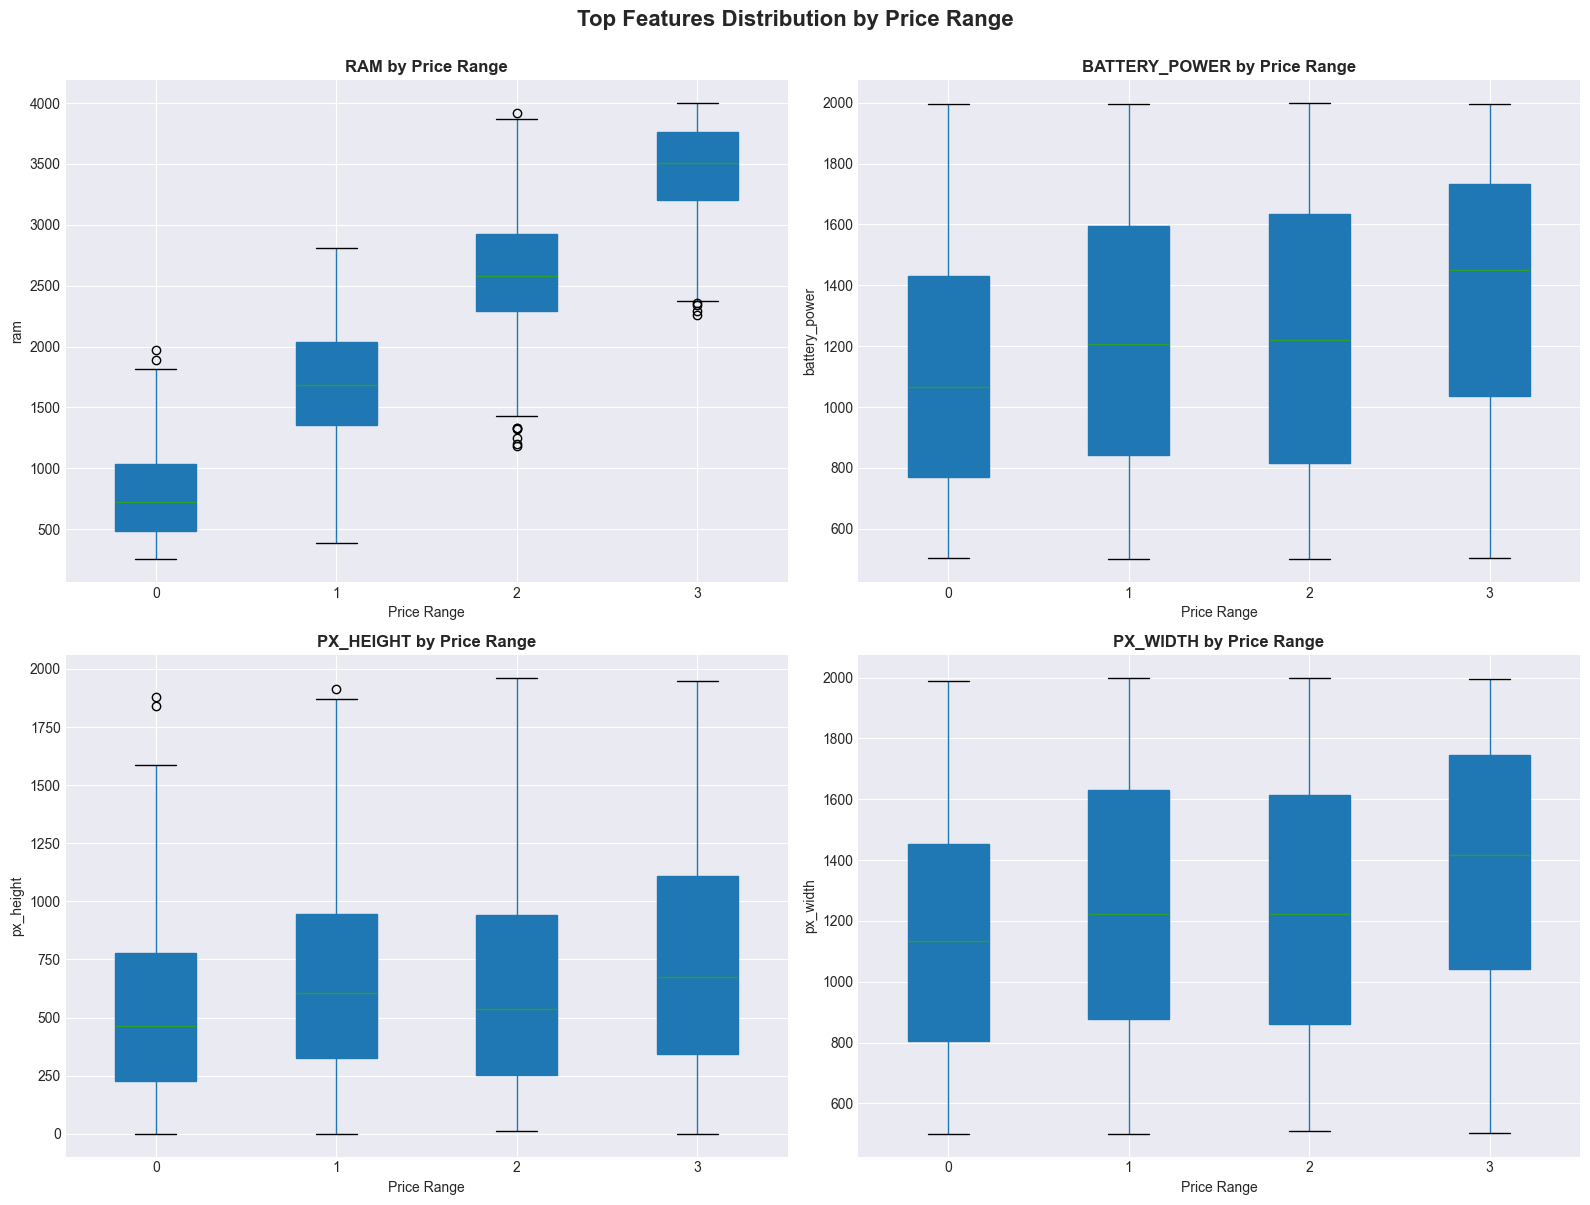

In [7]:

plt.figure(figsize=(18, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


# Correlation with target variable

target_correlation = df.corr()['price_range'].sort_values(ascending=False)
print("Correlation with Target Variable (price_range):")
print("="*80)
print(target_correlation)

# Visualize
plt.figure(figsize=(12, 8))
target_correlation[1:].plot(kind='barh', color='coral', edgecolor='black')
plt.title('Feature Correlation with Price Range', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Most Correlated Features:")
print(target_correlation[1:6])



# Feature Relationships with Target

# Box plots for top correlated features
top_features = ['ram', 'battery_power', 'px_height', 'px_width']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    df.boxplot(column=feature, by='price_range', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{feature.upper()} by Price Range', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Price Range', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].get_figure().suptitle('')

plt.suptitle('Top Features Distribution by Price Range', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


#### Pair plot for top 4 features

Text(0.5, 1.0, 'Pair Plot - Top 4 Features')

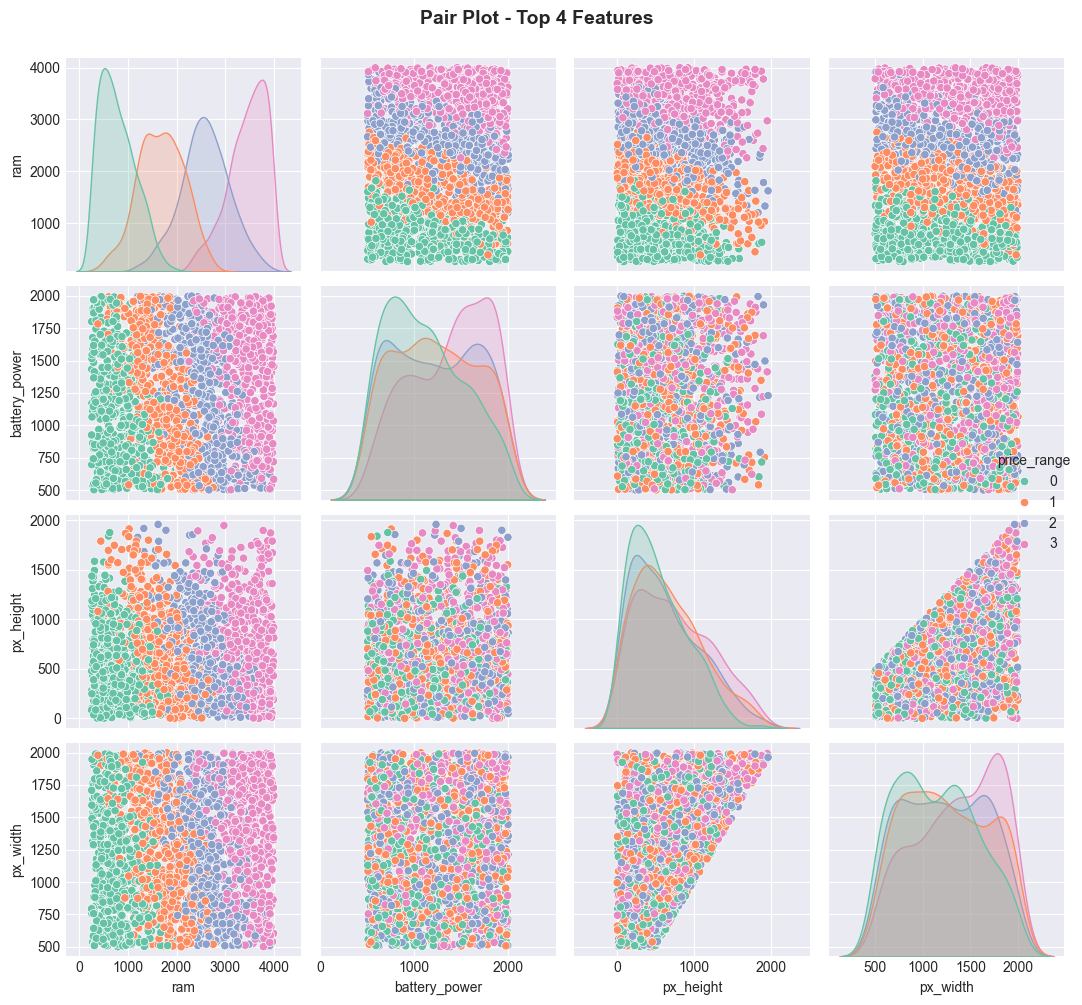

In [8]:

sample_features = ['ram', 'battery_power', 'px_height', 'px_width', 'price_range']
sns.pairplot(df[sample_features], hue='price_range', palette='Set2', height=2.5)
plt.suptitle('Pair Plot - Top 4 Features', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


### Dataset Feature Engineering

#### Create New Features

In [9]:
# Create a copy for feature engineering
df_engineered = df.copy()

# 1. Screen Area (px_height * px_width)
df_engineered['screen_area'] = df_engineered['px_height'] * df_engineered['px_width']

# 2. Screen Size (sc_h * sc_w)
df_engineered['screen_size'] = df_engineered['sc_h'] * df_engineered['sc_w']

# 3. Camera Quality (fc + pc)
df_engineered['total_camera_mp'] = df_engineered['fc'] + df_engineered['pc']

# 4. Feature Count (sum of binary features)
df_engineered['feature_count'] = (df_engineered['blue'] + df_engineered['dual_sim'] + 
                                  df_engineered['four_g'] + df_engineered['three_g'] + 
                                  df_engineered['touch_screen'] + df_engineered['wifi'])

# 5. Battery Efficiency (battery_power / mobile_wt)
df_engineered['battery_efficiency'] = df_engineered['battery_power'] / (df_engineered['mobile_wt'] + 1)

# 6. Performance Score (ram * n_cores * clock_speed)
df_engineered['performance_score'] = df_engineered['ram'] * df_engineered['n_cores'] * df_engineered['clock_speed']

print("New Features Created:")
print("="*80)
new_features = ['screen_area', 'screen_size', 'total_camera_mp', 'feature_count', 
                'battery_efficiency', 'performance_score']
for feature in new_features:
    print(f"✓ {feature}")

print(f"\nTotal Features: {df_engineered.shape[1] - 1} (Original: {df.shape[1] - 1}, New: {len(new_features)})")
df_engineered.head()

New Features Created:
✓ screen_area
✓ screen_size
✓ total_camera_mp
✓ feature_count
✓ battery_efficiency
✓ performance_score

Total Features: 26 (Original: 20, New: 6)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area,screen_size,total_camera_mp,feature_count,battery_efficiency,performance_score
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,15120,63,3,1,4.455026,11215.6
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1799140,51,6,5,7.452555,3946.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2167308,22,8,5,3.856164,6507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2171776,128,9,2,4.659091,41535.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1464096,16,27,4,12.823944,3386.4


#### Correlation of new features with target

Correlation of New Features with Price Range:
price_range           1.000000
performance_score     0.458104
battery_efficiency    0.177474
screen_area           0.176240
screen_size           0.041248
total_camera_mp       0.031621
feature_count         0.023516
Name: price_range, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'New Features Correlation with Price Range')

Text(0.5, 0, 'Correlation Coefficient')

Text(0, 0.5, 'New Features')

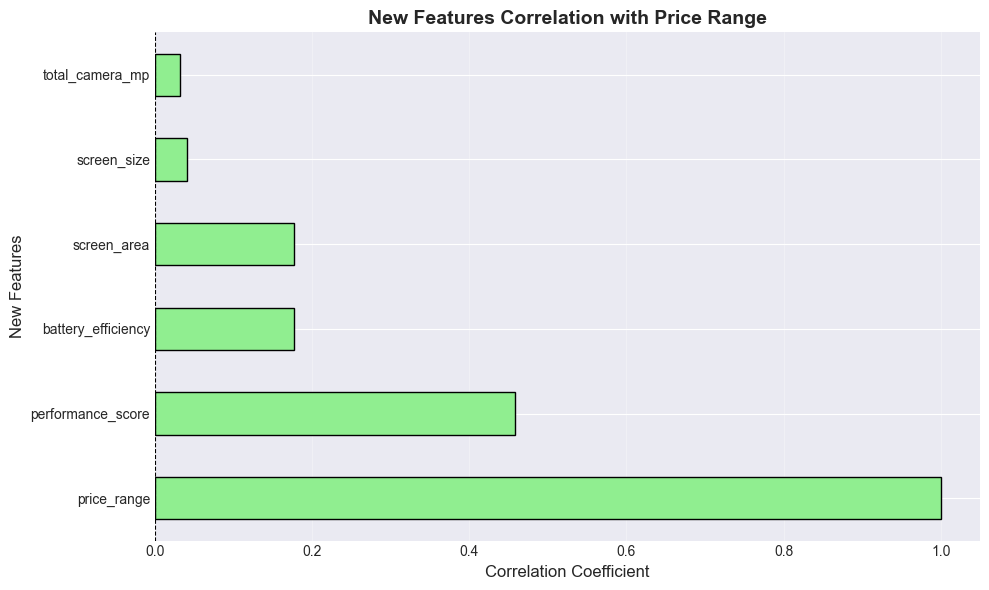

In [10]:
new_features_corr = df_engineered[new_features + ['price_range']].corr()['price_range'].sort_values(ascending=False)
print("Correlation of New Features with Price Range:")
print("="*80)
print(new_features_corr)

# Visualize
plt.figure(figsize=(10, 6))
new_features_corr[:-1].plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('New Features Correlation with Price Range', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('New Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Dataset Preprocessing

#### Missing and Duplicate Values handling

In [11]:
# Check for missing values
print("Missing Values:")
print("="*80)
missing_values = df_engineered.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

if missing_values.sum() == 0:
    print("\n✓ No missing values found!")
    

# Check for duplicate rows
print("Duplicate Rows:")
print("="*80)
duplicates = df_engineered.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("\n✓ No duplicate rows found!")



Missing Values:
battery_power         0
blue                  0
clock_speed           0
dual_sim              0
fc                    0
four_g                0
int_memory            0
m_dep                 0
mobile_wt             0
n_cores               0
pc                    0
px_height             0
px_width              0
ram                   0
sc_h                  0
sc_w                  0
talk_time             0
three_g               0
touch_screen          0
wifi                  0
price_range           0
screen_area           0
screen_size           0
total_camera_mp       0
feature_count         0
battery_efficiency    0
performance_score     0
dtype: int64

Total missing values: 0

✓ No missing values found!
Duplicate Rows:
Number of duplicate rows: 0

✓ No duplicate rows found!


#### Feature–Target Separation

In [12]:
X = df_engineered.drop('price_range', axis=1)
y = df_engineered['price_range']

print("Feature Matrix (X):")
print(f"Shape: {X.shape}")
print(f"\nTarget Vector (y):")
print(f"Shape: {y.shape}")
print(f"\nClasses: {sorted(y.unique())}")


Feature Matrix (X):
Shape: (2000, 26)

Target Vector (y):
Shape: (2000,)

Classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


#### Train–Test Split

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.10,
    random_state=42,
    stratify=y             # to maintain class distribution
)

print("Train-Test Split:")
print("="*80)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nFeatures: {X_train.shape[1]}")

print("\nClass Distribution in Training Set:")
print(y_train.value_counts().sort_index())
print("\nClass Distribution in Testing Set:")
print(y_test.value_counts().sort_index())


Train-Test Split:
Training set size: 1800 samples (90.0%)
Testing set size:  200 samples (10.0%)

Features: 26

Class Distribution in Training Set:
price_range
0    450
1    450
2    450
3    450
Name: count, dtype: int64

Class Distribution in Testing Set:
price_range
0    50
1    50
2    50
3    50
Name: count, dtype: int64


#### Feature Scaling - Normalization/Standardization

✓ Feature Scaling Completed!

Before Scaling (Sample):
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
428            1197     0          1.3         0   3       1          20   
1876            864     0          1.6         1   0       1          53   
1553            891     0          1.9         1   1       1          18   
1769            733     1          0.6         1   0       0          63   
1703            942     0          1.4         1   8       0          27   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
428     0.5        149        6   7        649      1629  1797    19     5   
1876    0.3         88        6   1        262      1436   493    18     9   
1553    0.1        153        6   3         40      1435  1303    17    16   
1769    0.3        105        7  10        950      1739   984    17     4   
1703    0.5         91        4   9        754      1532   587     6     3   

      talk_time  th

<Axes: >

Text(0.5, 1.0, 'Features BEFORE Scaling')

Text(0, 0.5, 'Value')

<Axes: >

Text(0.5, 1.0, 'Features AFTER Scaling')

Text(0, 0.5, 'Standardized Value')

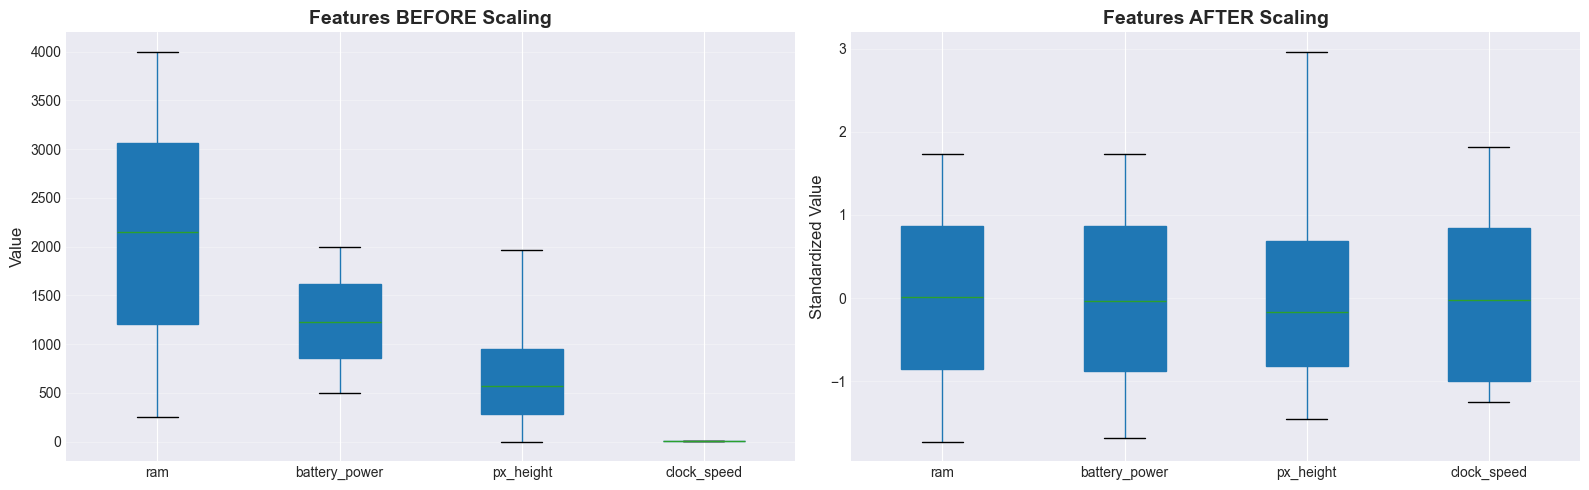


✓ Features are now on the same scale!


In [14]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Feature Scaling Completed!")
print("="*80)
print("\nBefore Scaling (Sample):")
print(X_train.head())
print("\nAfter Scaling (Sample):")
print(X_train_scaled_df.head())


# Verify scaling - check mean and std
print("Verification of Standardization:")
print("="*80)
print("Mean of scaled features:")
print(X_train_scaled_df.mean())
print("\nStd of scaled features:")
print(X_train_scaled_df.std())


# Visualize the effect of scaling
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before scaling
ax1 = axes[0]
X_train[['ram', 'battery_power', 'px_height', 'clock_speed']].boxplot(ax=ax1, patch_artist=True)
ax1.set_title('Features BEFORE Scaling', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# After scaling
ax2 = axes[1]
X_train_scaled_df[['ram', 'battery_power', 'px_height', 'clock_speed']].boxplot(ax=ax2, patch_artist=True)
ax2.set_title('Features AFTER Scaling', fontsize=14, fontweight='bold')
ax2.set_ylabel('Standardized Value', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
print("\n✓ Features are now on the same scale!")


## Model: Logistic Regression (Multi-Class)

### Model Building

In [15]:

model_log_reg = LogisticRegression(
    multi_class='multinomial',  # multi_class='ovr',
    solver='lbfgs',             # solver='saga WITH random_state=42
    max_iter=5000,              # Maximum iterations
    random_state=42,            # For reproducibility
    C=1.0,                      # Regularization strength
    penalty='l2'                # L2 regularization
)

print("Logistic Regression Model Initialized:")
print("="*80)
print(model_log_reg)
print("\nModel Parameters:")
print(f"  - Multi-class: multinomial")
print(f"  - Solver: lbfgs")
print(f"  - Max iterations: 1000")
print(f"  - Regularization: L2")
print(f"  - C (inverse regularization): 1.0")



Logistic Regression Model Initialized:
LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=42)

Model Parameters:
  - Multi-class: multinomial
  - Solver: lbfgs
  - Max iterations: 1000
  - Regularization: L2
  - C (inverse regularization): 1.0


### Model Training

In [16]:
# Train the model
import time

print("Training Logistic Regression Model...")
print("="*80)

start_time = time.time()
model_log_reg.fit(X_train_scaled, y_train)
end_time = time.time()

training_time = end_time - start_time

print(f"✓ Model trained successfully!")
print(f"Training time: {training_time:.4f} seconds")
print(f"\nNumber of iterations: {model_log_reg.n_iter_[0]}")

Training Logistic Regression Model...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,5000
,multi_class,'multinomial'


✓ Model trained successfully!
Training time: 0.0097 seconds

Number of iterations: 43


### Model Prediction

In [17]:

# Predictions on training set
y_train_pred = model_log_reg.predict(X_train_scaled)

# Predictions on testing set
y_test_pred = model_log_reg.predict(X_test_scaled)

# Prediction probabilities (needed for AUC)
y_train_pred_proba = model_log_reg.predict_proba(X_train_scaled)
y_test_pred_proba = model_log_reg.predict_proba(X_test_scaled)

print("✓ Predictions completed!")
print("="*80)
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Testing predictions shape: {y_test_pred.shape}")
print(f"\nPrediction probabilities shape (test): {y_test_pred_proba.shape}")
print(f"(Each sample has 4 probabilities, one for each class)")

# Sample predictions with probabilities
print("Sample Predictions with Probabilities:")
print("="*80)
sample_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_test_pred[:10],
    'Prob_Class_0': y_test_pred_proba[:10, 0],
    'Prob_Class_1': y_test_pred_proba[:10, 1],
    'Prob_Class_2': y_test_pred_proba[:10, 2],
    'Prob_Class_3': y_test_pred_proba[:10, 3]
})
print(sample_df)


✓ Predictions completed!
Training predictions shape: (1800,)
Testing predictions shape: (200,)

Prediction probabilities shape (test): (200, 4)
(Each sample has 4 probabilities, one for each class)
Sample Predictions with Probabilities:
   Actual  Predicted  Prob_Class_0  Prob_Class_1  Prob_Class_2  Prob_Class_3
0       2          2  6.672453e-07      0.027314  9.038092e-01  6.887607e-02
1       1          1  3.311343e-03      0.831714  1.649389e-01  3.601430e-05
2       0          0  9.992992e-01      0.000701  1.952563e-09  1.477863e-18
3       2          2  7.726637e-06      0.080506  9.085425e-01  1.094356e-02
4       3          3  9.991330e-10      0.000815  3.806424e-01  6.185425e-01
5       0          0  6.312697e-01      0.368384  3.458449e-04  2.754824e-10
6       1          1  7.362199e-02      0.911422  1.495645e-02  5.046530e-08
7       0          0  7.526159e-01      0.247212  1.720721e-04  8.631641e-11
8       3          3  1.265224e-12      0.000010  2.956955e-02  9.7042

### Model Evaluation

#### Evaluation Metrics

In [18]:
# 1. ACCURACY
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*80)
print("1. ACCURACY SCORE")
print("="*80)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nInterpretation: {test_accuracy*100:.2f}% of predictions are correct")

1. ACCURACY SCORE
Training Accuracy: 0.9711 (97.11%)
Testing Accuracy:  0.9500 (95.00%)

Interpretation: 95.00% of predictions are correct


In [19]:
from sklearn.preprocessing import label_binarize

# 2. AUC SCORE (Multi-class using One-vs-Rest approach)
# Binarize the output for multi-class AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Calculate AUC for each class
auc_scores = {}
for i in range(n_classes):
    auc_scores[f'Class_{i}'] = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])

# Calculate macro and weighted average AUC
auc_macro = roc_auc_score(y_test_binarized, y_test_pred_proba, average='macro', multi_class='ovr')
auc_weighted = roc_auc_score(y_test_binarized, y_test_pred_proba, average='weighted', multi_class='ovr')

print("="*80)
print("2. AUC SCORE (Area Under ROC Curve)")
print("="*80)
for class_name, score in auc_scores.items():
    print(f"{class_name}: {score:.4f}")
print(f"\nMacro-Average AUC:    {auc_macro:.4f}")
print(f"Weighted-Average AUC: {auc_weighted:.4f}")
print(f"\nInterpretation: AUC of {auc_weighted:.4f} indicates {'excellent' if auc_weighted > 0.9 else 'good' if auc_weighted > 0.8 else 'fair'} model performance")

2. AUC SCORE (Area Under ROC Curve)
Class_0: 1.0000
Class_1: 0.9975
Class_2: 0.9943
Class_3: 0.9993

Macro-Average AUC:    0.9978
Weighted-Average AUC: 0.9978

Interpretation: AUC of 0.9978 indicates excellent model performance


In [20]:
# 3. PRECISION
precision_macro = precision_score(y_test, y_test_pred, average='macro')
precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
precision_per_class = precision_score(y_test, y_test_pred, average=None)

print("="*80)
print("3. PRECISION SCORE")
print("="*80)
for i, prec in enumerate(precision_per_class):
    print(f"Class {i}: {prec:.4f}")
print(f"\nMacro-Average Precision:    {precision_macro:.4f}")
print(f"Weighted-Average Precision: {precision_weighted:.4f}")
print(f"\nInterpretation: {precision_weighted*100:.2f}% of predicted positives are actually positive")

3. PRECISION SCORE
Class 0: 1.0000
Class 1: 0.9216
Class 2: 0.9362
Class 3: 0.9434

Macro-Average Precision:    0.9503
Weighted-Average Precision: 0.9503

Interpretation: 95.03% of predicted positives are actually positive


In [21]:
# 4. RECALL
recall_macro = recall_score(y_test, y_test_pred, average='macro')
recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
recall_per_class = recall_score(y_test, y_test_pred, average=None)

print("="*80)
print("4. RECALL SCORE (Sensitivity)")
print("="*80)
for i, rec in enumerate(recall_per_class):
    print(f"Class {i}: {rec:.4f}")
print(f"\nMacro-Average Recall:    {recall_macro:.4f}")
print(f"Weighted-Average Recall: {recall_weighted:.4f}")
print(f"\nInterpretation: {recall_weighted*100:.2f}% of actual positives are predicted correctly")

4. RECALL SCORE (Sensitivity)
Class 0: 0.9800
Class 1: 0.9400
Class 2: 0.8800
Class 3: 1.0000

Macro-Average Recall:    0.9500
Weighted-Average Recall: 0.9500

Interpretation: 95.00% of actual positives are predicted correctly


In [22]:
# 5. F1 SCORE
f1_macro = f1_score(y_test, y_test_pred, average='macro')
f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
f1_per_class = f1_score(y_test, y_test_pred, average=None)

print("="*80)
print("5. F1 SCORE (Harmonic Mean of Precision and Recall)")
print("="*80)
for i, f1 in enumerate(f1_per_class):
    print(f"Class {i}: {f1:.4f}")
print(f"\nMacro-Average F1:    {f1_macro:.4f}")
print(f"Weighted-Average F1: {f1_weighted:.4f}")
print(f"\nInterpretation: Balanced measure of precision and recall")

5. F1 SCORE (Harmonic Mean of Precision and Recall)
Class 0: 0.9899
Class 1: 0.9307
Class 2: 0.9072
Class 3: 0.9709

Macro-Average F1:    0.9497
Weighted-Average F1: 0.9497

Interpretation: Balanced measure of precision and recall


In [23]:
# 6. MATTHEWS CORRELATION COEFFICIENT (MCC)
mcc = matthews_corrcoef(y_test, y_test_pred)

print("="*80)
print("6. MATTHEWS CORRELATION COEFFICIENT (MCC)")
print("="*80)
print(f"MCC Score: {mcc:.4f}")
print(f"\nInterpretation:")
print(f"  MCC ranges from -1 to +1")
print(f"  +1 = Perfect prediction")
print(f"   0 = Random prediction")
print(f"  -1 = Complete disagreement")
if mcc > 0.8:
    print(f"  {mcc:.4f} indicates EXCELLENT correlation")
elif mcc > 0.6:
    print(f"  {mcc:.4f} indicates GOOD correlation")
elif mcc > 0.4:
    print(f"  {mcc:.4f} indicates MODERATE correlation")
else:
    print(f"  {mcc:.4f} indicates FAIR correlation")

6. MATTHEWS CORRELATION COEFFICIENT (MCC)
MCC Score: 0.9336

Interpretation:
  MCC ranges from -1 to +1
  +1 = Perfect prediction
   0 = Random prediction
  -1 = Complete disagreement
  0.9336 indicates EXCELLENT correlation


#### Model Performance Comparison (Train vs Test)

Train vs Test Performance:
           Training   Testing
Accuracy   0.971111  0.950000
Precision  0.971077  0.950284
Recall     0.971111  0.950000
F1 Score   0.971068  0.949671

Overfitting Check:
Difference in Accuracy: 0.0211
✓ Model is NOT overfitting (difference < 5%)


<Axes: >

Text(0.5, 1.0, 'Training vs Testing Performance Comparison')

Text(0.5, 0, 'Metrics')

Text(0, 0.5, 'Score')

(0.0, 1.0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1 Score')])

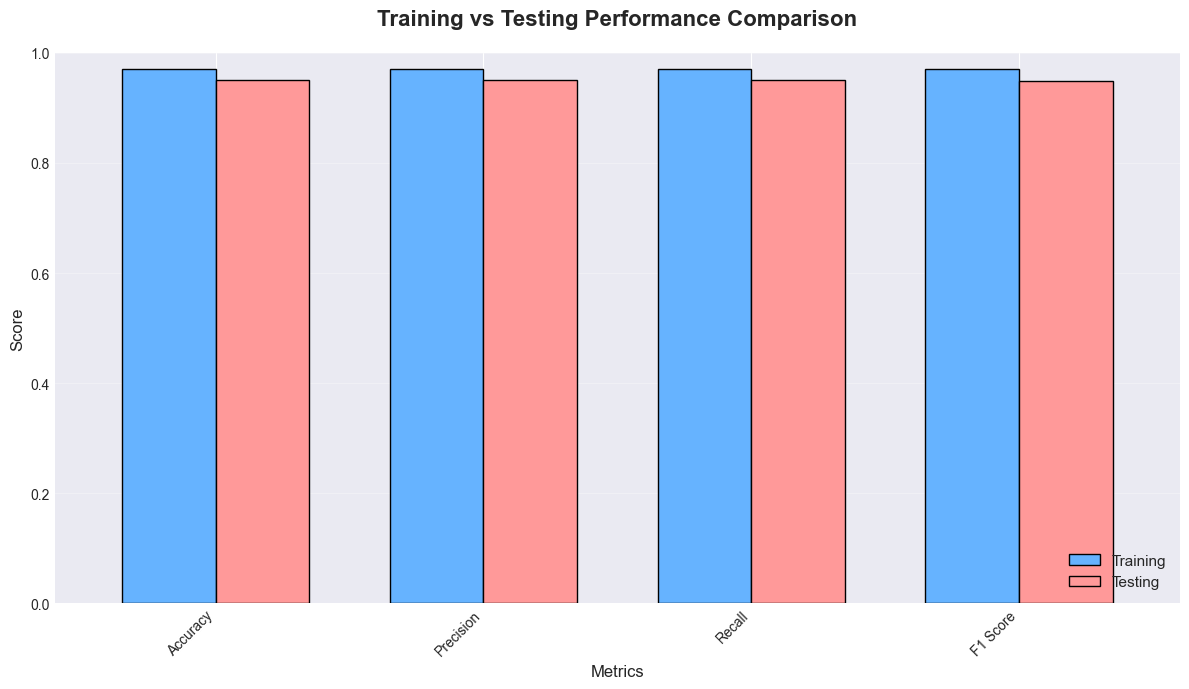

In [24]:
# Compare train vs test performance
train_metrics = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred, average='weighted'),
    'Recall': recall_score(y_train, y_train_pred, average='weighted'),
    'F1 Score': f1_score(y_train, y_train_pred, average='weighted')
}

test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': precision_weighted,
    'Recall': recall_weighted,
    'F1 Score': f1_weighted
}

comparison_df = pd.DataFrame({
    'Training': list(train_metrics.values()),
    'Testing': list(test_metrics.values())
}, index=list(train_metrics.keys()))

print("Train vs Test Performance:")
print("="*80)
print(comparison_df)
print("\nOverfitting Check:")
print(f"Difference in Accuracy: {abs(train_metrics['Accuracy'] - test_metrics['Accuracy']):.4f}")
if abs(train_metrics['Accuracy'] - test_metrics['Accuracy']) < 0.05:
    print("✓ Model is NOT overfitting (difference < 5%)")
else:
    print("⚠ Model might be overfitting (difference >= 5%)")


# Visualize train vs test comparison
comparison_df.plot(kind='bar', figsize=(12, 7), color=['#66b3ff', '#ff9999'], 
                  edgecolor='black', width=0.7)
plt.title('Training vs Testing Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(['Training', 'Testing'], loc='lower right', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### Comprehensive Evaluation Summary on Test Data

In [25]:
evaluation_summary = pd.DataFrame({
    'Metric': [
        'Accuracy',
        'AUC (Macro)',
        'AUC (Weighted)',
        'Precision (Macro)',
        'Precision (Weighted)',
        'Recall (Macro)',
        'Recall (Weighted)',
        'F1 Score (Macro)',
        'F1 Score (Weighted)',
        'MCC'
    ],
    'Score': [
        test_accuracy,
        auc_macro,
        auc_weighted,
        precision_macro,
        precision_weighted,
        recall_macro,
        recall_weighted,
        f1_macro,
        f1_weighted,
        mcc
    ]
})

print("\n" + "="*80)
print("COMPREHENSIVE EVALUATION SUMMARY - LOGISTIC REGRESSION")
print("="*80)
print(evaluation_summary.to_string(index=False))
print("="*80)


COMPREHENSIVE EVALUATION SUMMARY - LOGISTIC REGRESSION
              Metric    Score
            Accuracy 0.950000
         AUC (Macro) 0.997767
      AUC (Weighted) 0.997767
   Precision (Macro) 0.950284
Precision (Weighted) 0.950284
      Recall (Macro) 0.950000
   Recall (Weighted) 0.950000
    F1 Score (Macro) 0.949671
 F1 Score (Weighted) 0.949671
                 MCC 0.933645


#### Classification Report

In [26]:
# Detailed classification report
print("="*80)
print("CLASSIFICATION REPORT")
print("="*80)
report = classification_report(y_test, y_test_pred, 
                               target_names=['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)'])
print(report)

CLASSIFICATION REPORT
               precision    recall  f1-score   support

      Low (0)       1.00      0.98      0.99        50
   Medium (1)       0.92      0.94      0.93        50
     High (2)       0.94      0.88      0.91        50
Very High (3)       0.94      1.00      0.97        50

     accuracy                           0.95       200
    macro avg       0.95      0.95      0.95       200
 weighted avg       0.95      0.95      0.95       200



#### Visualize Evaluation Metrics

Text(0.5, 0, 'Score')

Text(0.5, 1.0, 'Logistic Regression - Evaluation Metrics Summary')

(0.0, 1.0)

Text(0.96, 0.0, '0.9500')

Text(1.0077666666666667, 1.0, '0.9978')

Text(1.0077666666666667, 2.0, '0.9978')

Text(0.960283766658008, 3.0, '0.9503')

Text(0.9602837666580081, 4.0, '0.9503')

Text(0.96, 5.0, '0.9500')

Text(0.96, 6.0, '0.9500')

Text(0.9596705851147621, 7.0, '0.9497')

Text(0.9596705851147621, 8.0, '0.9497')

Text(0.9436446000864702, 9.0, '0.9336')

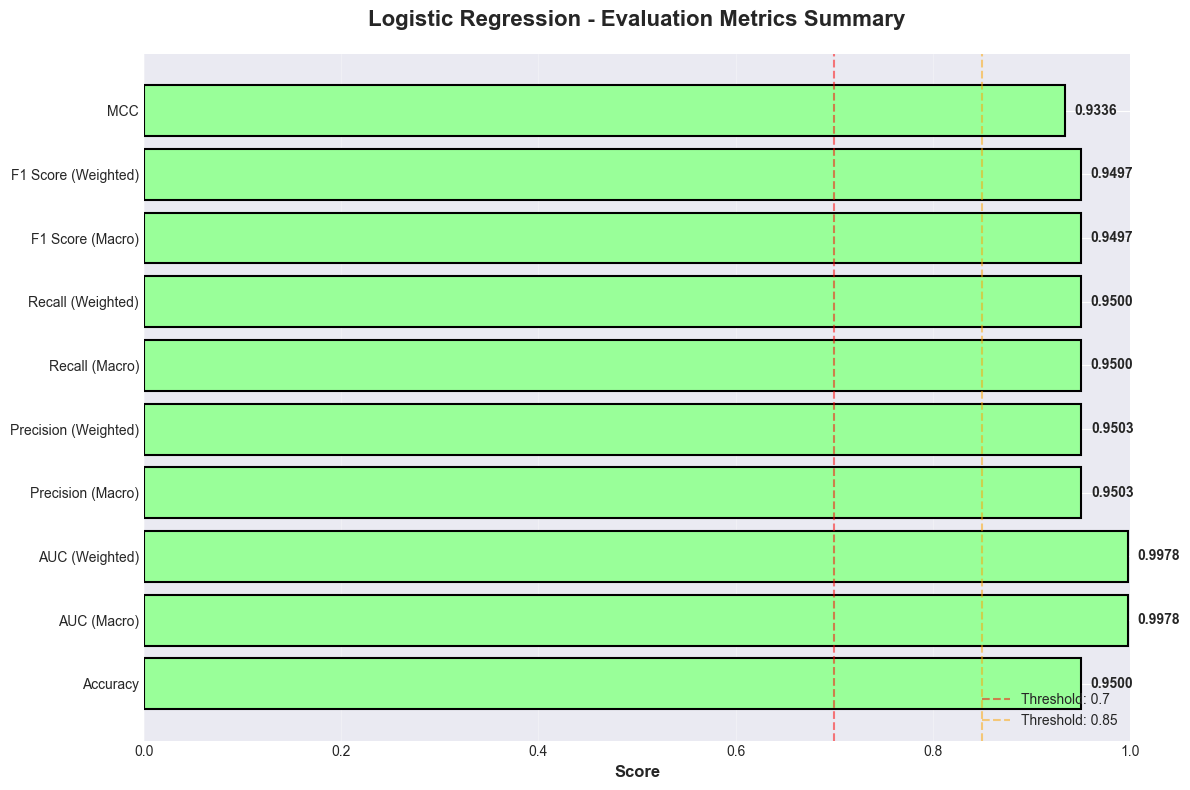

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

metrics = evaluation_summary['Metric'].values
scores = evaluation_summary['Score'].values

colors = ['#ff9999' if score < 0.7 else '#66b3ff' if score < 0.85 else '#99ff99' for score in scores]

bars = ax.barh(metrics, scores, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Logistic Regression - Evaluation Metrics Summary', fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(0, 1.0)
ax.axvline(x=0.7, color='red', linestyle='--', alpha=0.5, label='Threshold: 0.7')
ax.axvline(x=0.85, color='orange', linestyle='--', alpha=0.5, label='Threshold: 0.85')
ax.grid(axis='x', alpha=0.3)
ax.legend(loc='lower right')

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    ax.text(score + 0.01, bar.get_y() + bar.get_height()/2, f'{score:.4f}', 
            va='center', ha='left', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

#### Visualize Confusion Matrix

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

Text(0.5, 63.583333333333314, 'Predicted Class')

Text(104.58333333333333, 0.5, 'Actual Class')

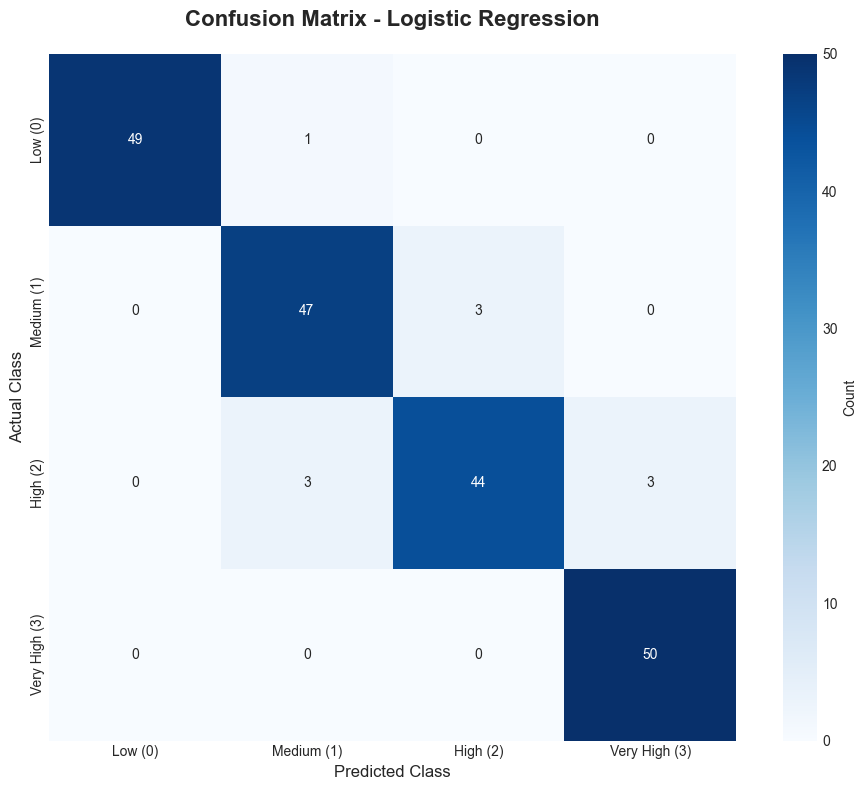

Confusion Matrix:
[[49  1  0  0]
 [ 0 47  3  0]
 [ 0  3 44  3]
 [ 0  0  0 50]]


In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)'],
            yticklabels=['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print("="*80)
print(cm)

#### ROC Curves (One-vs-Rest)

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - Low (0)')

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - Medium (1)')

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - High (2)')

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - Very High (3)')

Text(0.5, 1.0, 'ROC Curves - One-vs-Rest Multi-Class Classification')

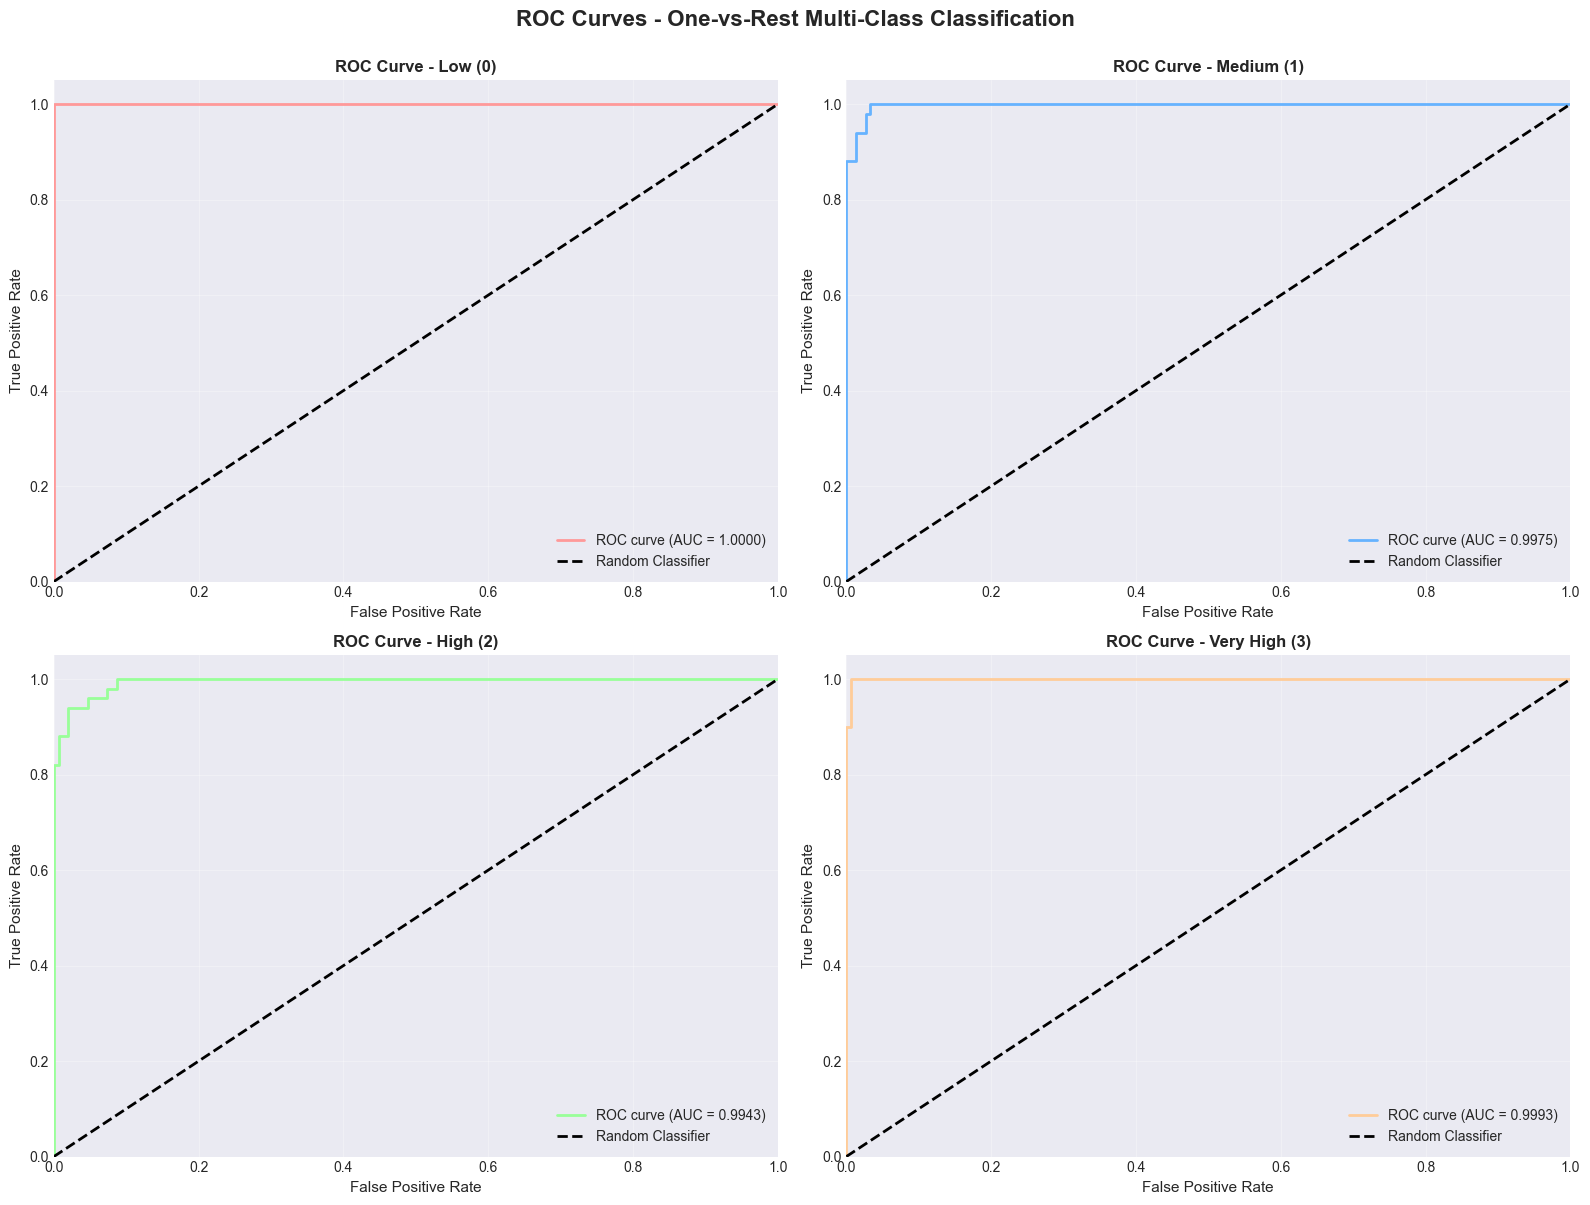

In [29]:
# Plot ROC curves for each class
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

class_names = ['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for i in range(n_classes):
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot
    axes[i].plot(fpr, tpr, color=colors[i], lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.4f})')
    axes[i].plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate', fontsize=11)
    axes[i].set_ylabel('True Positive Rate', fontsize=11)
    axes[i].set_title(f'ROC Curve - {class_names[i]}', fontsize=12, fontweight='bold')
    axes[i].legend(loc='lower right', fontsize=10)
    axes[i].grid(alpha=0.3)

plt.suptitle('ROC Curves - One-vs-Rest Multi-Class Classification', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### Feature Importance (Coefficients)

Feature Coefficients:
                      Class_0   Class_1   Class_2    Class_3
battery_power       -2.591908 -0.666559  0.716578   2.541890
blue                 0.034870 -0.010099  0.024263  -0.049034
clock_speed          0.609421  0.017663 -0.391639  -0.235445
dual_sim             0.086491  0.030605 -0.090158  -0.026938
fc                  -0.071909  0.026092  0.052146  -0.006329
four_g              -0.072784 -0.003945 -0.074111   0.150839
int_memory          -0.193405 -0.082715 -0.004322   0.280442
m_dep                0.004563  0.069019 -0.058217  -0.015366
mobile_wt            0.212547  0.006735  0.133121  -0.352404
n_cores              0.502326 -0.033006 -0.292070  -0.177251
pc                   0.012003 -0.061062 -0.008146   0.057205
px_height           -0.928315 -0.431692  0.070998   1.289009
px_width            -1.435092 -0.539715  0.365050   1.609757
ram                -10.966669 -3.648073  3.387429  11.227313
sc_h                 0.049929 -0.045912 -0.114653   0.110637
sc

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top 15 Most Important Features')

Text(0.5, 0, 'Average Absolute Coefficient')

Text(0, 0.5, 'Features')

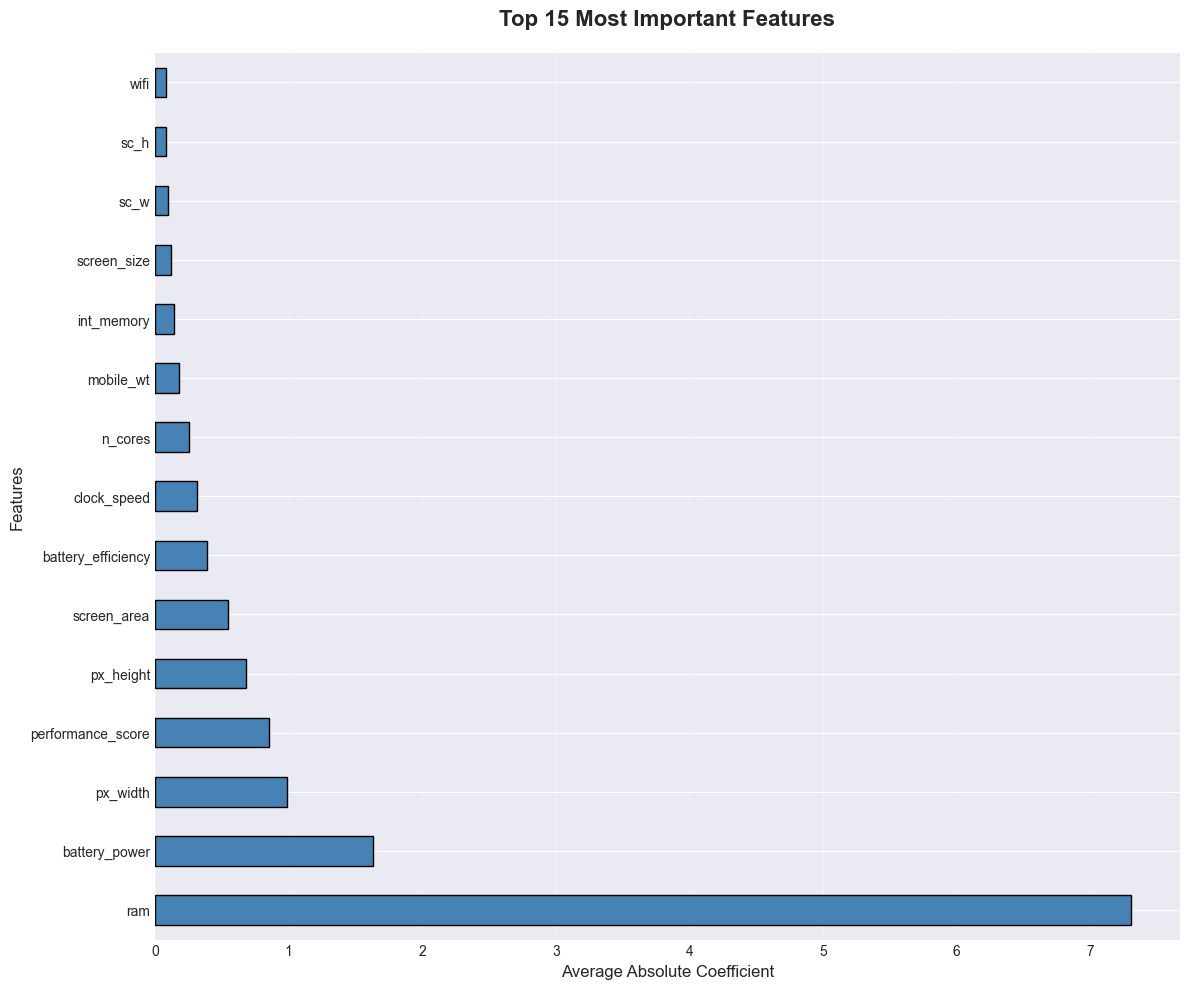

<Axes: >

Text(0.5, 1.0, 'Top 10 Features - Class 0 (Low)')

Text(0.5, 0, 'Coefficient Value')

<Axes: >

Text(0.5, 1.0, 'Top 10 Features - Class 1 (Medium)')

Text(0.5, 0, 'Coefficient Value')

<Axes: >

Text(0.5, 1.0, 'Top 10 Features - Class 2 (High)')

Text(0.5, 0, 'Coefficient Value')

<Axes: >

Text(0.5, 1.0, 'Top 10 Features - Class 3 (Very High)')

Text(0.5, 0, 'Coefficient Value')

Text(0.5, 1.0, 'Feature Coefficients by Class')

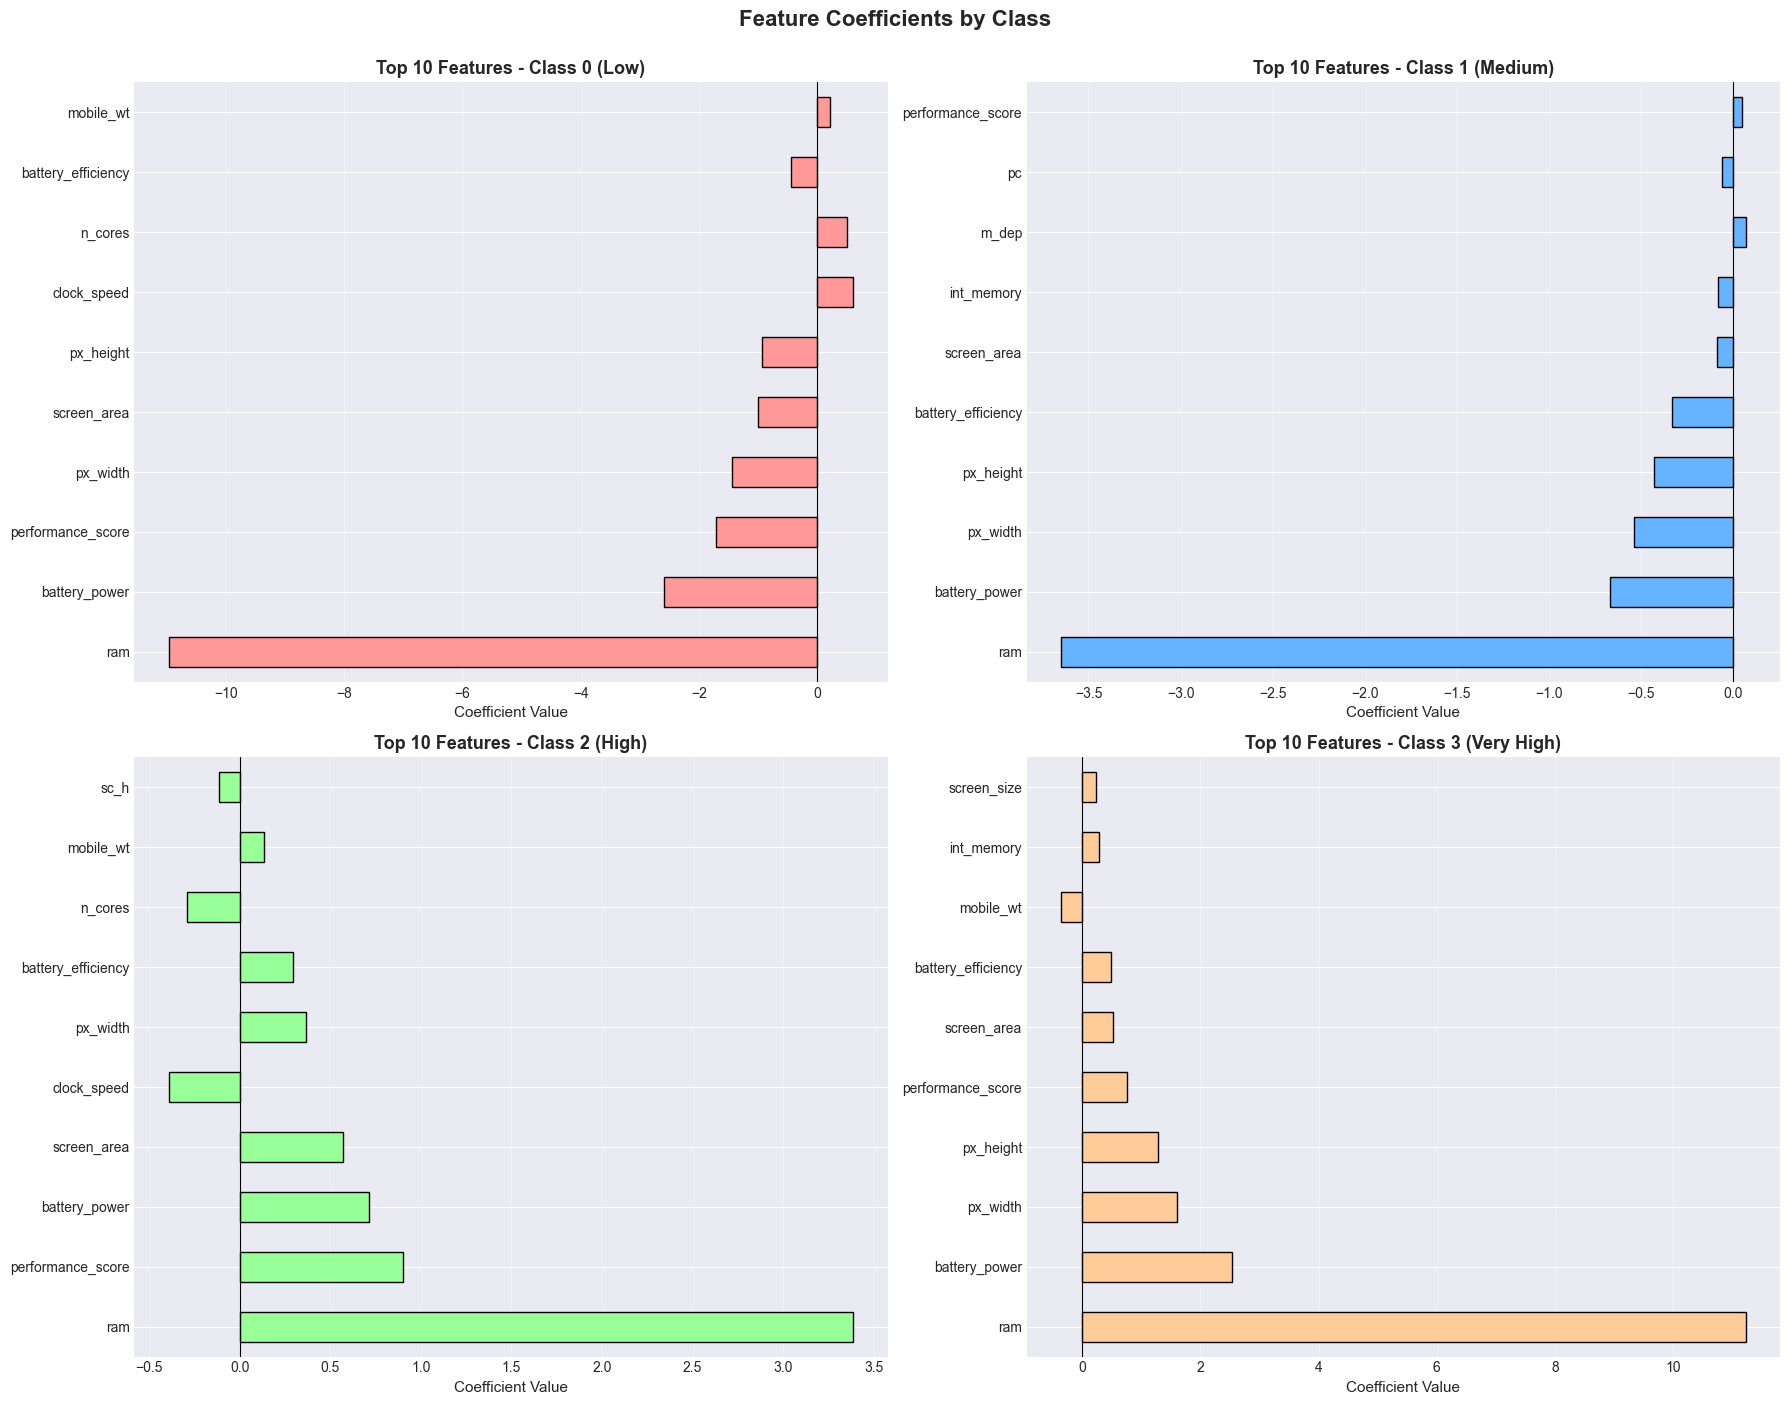

In [30]:
# Get feature coefficients
coefficients = model_log_reg.coef_
feature_names = X_train.columns

# Create DataFrame for better visualization
coef_df = pd.DataFrame(coefficients.T, columns=['Class_0', 'Class_1', 'Class_2', 'Class_3'], 
                      index=feature_names)

print("Feature Coefficients:")
print("="*80)
print(coef_df)

# Calculate absolute importance (average across classes)
coef_df['Avg_Abs_Importance'] = coef_df.abs().mean(axis=1)
coef_df_sorted = coef_df.sort_values('Avg_Abs_Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(coef_df_sorted.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 10))
top_features = coef_df_sorted.head(15)
top_features['Avg_Abs_Importance'].plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Top 15 Most Important Features', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Absolute Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# Visualize coefficients for each class
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

class_names = ['Class 0 (Low)', 'Class 1 (Medium)', 'Class 2 (High)', 'Class 3 (Very High)']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for i, class_name in enumerate(class_names):
    top_10_features = coef_df[f'Class_{i}'].abs().sort_values(ascending=False).head(10)
    feature_coefs = coef_df.loc[top_10_features.index, f'Class_{i}']
    
    feature_coefs.plot(kind='barh', ax=axes[i], color=colors[i], edgecolor='black')
    axes[i].set_title(f'Top 10 Features - {class_name}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Coefficient Value', fontsize=11)
    axes[i].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    axes[i].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Coefficients by Class', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


# Final Results and Conclusion on Logistic Regression (Multi-Class)

In [31]:
print("\n" + "="*80)
print("FINAL RESULTS - LOGISTIC REGRESSION MULTI-CLASS CLASSIFICATION")
print("="*80)
print(f"\nDataset: Mobile Price Classification (Kaggle)")
print(f"Total Samples: {len(df)}")
print(f"Features Used: {X_train.shape[1]}")
print(f"Classes: 4 (Low, Medium, High, Very High)")
print(f"\nTraining Set: {len(X_train)} samples")
print(f"Testing Set:  {len(X_test)} samples")
print("\n" + "-"*80)
print("EVALUATION METRICS (on Test Set):")
print("-"*80)
print(f"1. Accuracy:                {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"2. AUC Score (Macro):       {auc_macro:.4f}")
print(f"3. AUC Score (Weighted):    {auc_weighted:.4f}")
print(f"4. Precision (Weighted):    {precision_weighted:.4f}")
print(f"5. Recall (Weighted):       {recall_weighted:.4f}")
print(f"6. F1 Score (Weighted):     {f1_weighted:.4f}")
print(f"7. MCC Score:               {mcc:.4f}")
print("\n" + "-"*80)
print("KEY INSIGHTS:")
print("-"*80)
print(f"✓ Model achieves {test_accuracy*100:.2f}% accuracy on unseen data")
print(f"✓ AUC of {auc_weighted:.4f} indicates {'excellent' if auc_weighted > 0.9 else 'good' if auc_weighted > 0.8 else 'fair'} discriminative ability")
print(f"✓ Balanced performance across Precision ({precision_weighted:.4f}) and Recall ({recall_weighted:.4f})")
print(f"✓ MCC of {mcc:.4f} shows {'strong' if mcc > 0.7 else 'moderate' if mcc > 0.5 else 'fair'} correlation")
print(f"✓ Top predictive features: RAM, Battery Power, Screen Area")
print("="*80)
print("\n✓ ASSIGNMENT COMPLETED SUCCESSFULLY!")
print("="*80)


FINAL RESULTS - LOGISTIC REGRESSION MULTI-CLASS CLASSIFICATION

Dataset: Mobile Price Classification (Kaggle)
Total Samples: 2000
Features Used: 26
Classes: 4 (Low, Medium, High, Very High)

Training Set: 1800 samples
Testing Set:  200 samples

--------------------------------------------------------------------------------
EVALUATION METRICS (on Test Set):
--------------------------------------------------------------------------------
1. Accuracy:                0.9500 (95.00%)
2. AUC Score (Macro):       0.9978
3. AUC Score (Weighted):    0.9978
4. Precision (Weighted):    0.9503
5. Recall (Weighted):       0.9500
6. F1 Score (Weighted):     0.9497
7. MCC Score:               0.9336

--------------------------------------------------------------------------------
KEY INSIGHTS:
--------------------------------------------------------------------------------
✓ Model achieves 95.00% accuracy on unseen data
✓ AUC of 0.9978 indicates excellent discriminative ability
✓ Balanced performan

# Save Model and Results (Only in Local Once, then Comment)

In [32]:
import pickle

# Save the trained model
with open("saved_models/logistic_regression_model.pkl", 'wb') as f:
    pickle.dump(model_log_reg, f)

# Save scaler
with open("saved_models/standard_scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)

# Save evaluation results
evaluation_summary.to_csv("saved_models/logistic_regression_evaluation_metrics.csv", index=False)

print("✓ Model, scaler, and results saved successfully!")
print("  - logistic_regression_model.pkl")
print("  - standard_scaler.pkl")
print("  - logistic_regression_evaluation_metrics.csv")

✓ Model, scaler, and results saved successfully!
  - logistic_regression_model.pkl
  - standard_scaler.pkl
  - logistic_regression_evaluation_metrics.csv
